# Анализ работы развлекательного приложения Procrastinate Pro+

# ВВЕДЕНИЕ

Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Находясь в роли маркетингового аналитика необходимо разобраться в причинах убытков и сформулировать рекомендации, чтобы вывести компанию в плюс. Для проведения анализа доступны данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года, в том числе:

- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.


Сформулируем основную **цель исследования** — разобраться в причинах убытков и помочь компании выйти в плюс.

Для достижения вышеуказанной цели сформулируем **задачи для выполнения**:

- провести предобработку данных (т.к. об их качестве нам ничего не известно),
- задать функции для расчета метрик и их визуализации (т.к. потребуется неоднократное выполнение однотипных задач с различной детализацией),
- выяснить откуда приходят пользователи и какими устройствами они пользуются,
- определить сколько стоит привлечение пользователей из различных рекламных каналов;
- определить сколько денег приносит каждый клиент,
- выяснить когда расходы на привлечение клиента окупаются,
- определить какие факторы мешают привлечению клиентов,
- сформулировать рекомендации для исключения/минимизации убытков компании.клиентов.

## Загрузка данных и подготовка их к анализу
<a id='to_beginning'></a>

### Знакомство с данными

Импортируем библиотеки Python, с которыми будем работать.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta

Загрузим данные из имеющихся файлов, присвоим переменные.

In [2]:
try:
    sessions = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    ad_costs = pd.read_csv('/datasets/costs_info_short.csv')
except:
    sessions = pd.read_csv('C:/Users/sutul/datasets/Procrastinate Pro+/visits_info_short.csv')
    orders = pd.read_csv('C:/Users/sutul/datasets/Procrastinate Pro+/orders_info_short.csv')
    ad_costs = pd.read_csv('C:/Users/sutul/datasets/Procrastinate Pro+/costs_info_short.csv')

In [3]:
display(sessions.head(), orders.head(), ad_costs.head())

User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

### Предобработка данных

Взглянем на размеры датасетов, типы данных, явные дубликаты, наименование категориальных значений и пропуски.

In [4]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [5]:
print('явных дубликатов -', sessions.duplicated().sum())

явных дубликатов - 0


In [6]:
sessions['Region'].unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

In [7]:
sessions['Device'].unique()

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

In [8]:
sessions['Channel'].unique()

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [9]:
sessions.isna().sum()

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

Явных дубликатов нет, наименование категориальных значений верные, пропусков нет.

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [11]:
print('явных дубликатов -', orders.duplicated().sum())

явных дубликатов - 0


In [12]:
orders.isna().sum()

User Id     0
Event Dt    0
Revenue     0
dtype: int64

Явных дубликатов нет, пропусков нет. Требуется поменять тип данных у столбца 'Event Dt'.

In [13]:
ad_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [14]:
print('явных дубликатов -', ad_costs.duplicated().sum())

явных дубликатов - 0


In [15]:
ad_costs['Channel'].unique()

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

In [16]:
ad_costs.isna().sum()

dt         0
Channel    0
costs      0
dtype: int64

Явных дубликатов нет, наименование категориальных значений верные, пропусков нет.

Значения даты и времени нуждаются в изменении типов данных, произведем необходимые манипуляции - приведем данные к формату datetime. Также, для дальнейшего удобства приведем названия столбцов к "змеинному регистру".

In [17]:
sessions.columns = sessions.columns.str.lower().str.replace(' ', '_')
sessions['session_start'] = pd.to_datetime(sessions['session_start'])
sessions['session_end'] = pd.to_datetime(sessions['session_end'])
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [18]:
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [19]:
ad_costs.columns = ad_costs.columns.str.lower().str.replace(' ', '_')
ad_costs['dt'] = pd.to_datetime(ad_costs['dt']).dt.date
ad_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Посмотрим на возможные аномалии в данных.

Для начала проверим на отсутствие отрицательных и нулевых численных значений в датасетах orders и ad_costs.

In [20]:
len(orders.query('revenue <= 0'))

0

In [21]:
len(ad_costs.query('costs <= 0'))

0

Отрицательные и нулевые значения отсутствуют.

Посмотрим соответствуют ли временные диапазоны датасетов друг другу и условию проекта.

In [22]:
print("sessions:", sessions['session_start'].min().date(), sessions['session_start'].max().date())
print("orders:", orders['event_dt'].min().date(), orders['event_dt'].max().date())
print("ad_costs:", ad_costs['dt'].min(), ad_costs['dt'].max())

sessions: 2019-05-01 2019-10-31
orders: 2019-05-01 2019-10-31
ad_costs: 2019-05-01 2019-10-27


Данные о стоимости рекламных компаний заканчиваются на 10 октября, возможно в оставшиеся дни октября попросту рекламных компаний не было. В целом интервалы соответствуют друг другу.

Проверим численные значения в датасетах orders и ad_costs на предмет аномалий с помощью гистограмм.

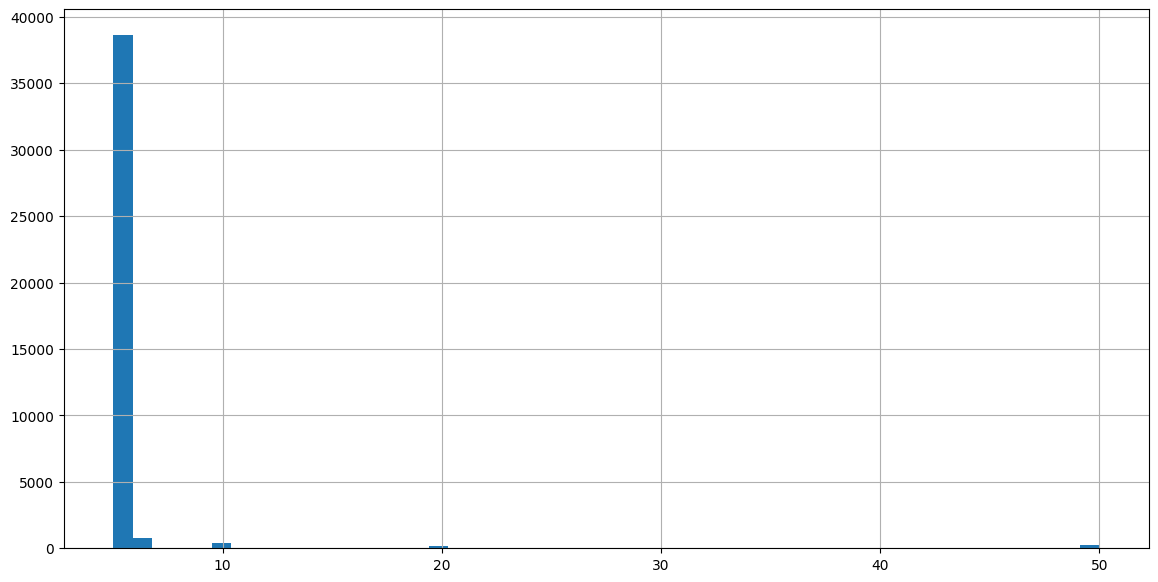

In [23]:
orders['revenue'].hist(figsize=(14, 7), bins=50);

Учитывая отсутствие у нас информации о конкретных видах услуг компании, предположим, что существует несколько тарифов/видов подписок на приложение Procrastinate Pro+. С учетом недостаточности данных нельзя сделать выводв об аномальности или нормальности высоких значений, основываясь на нашем предположении данные удалять не будем.

In [24]:
orders['revenue'].value_counts()

4.99     38631
5.99       780
9.99       385
49.99      212
19.99      204
Name: revenue, dtype: int64

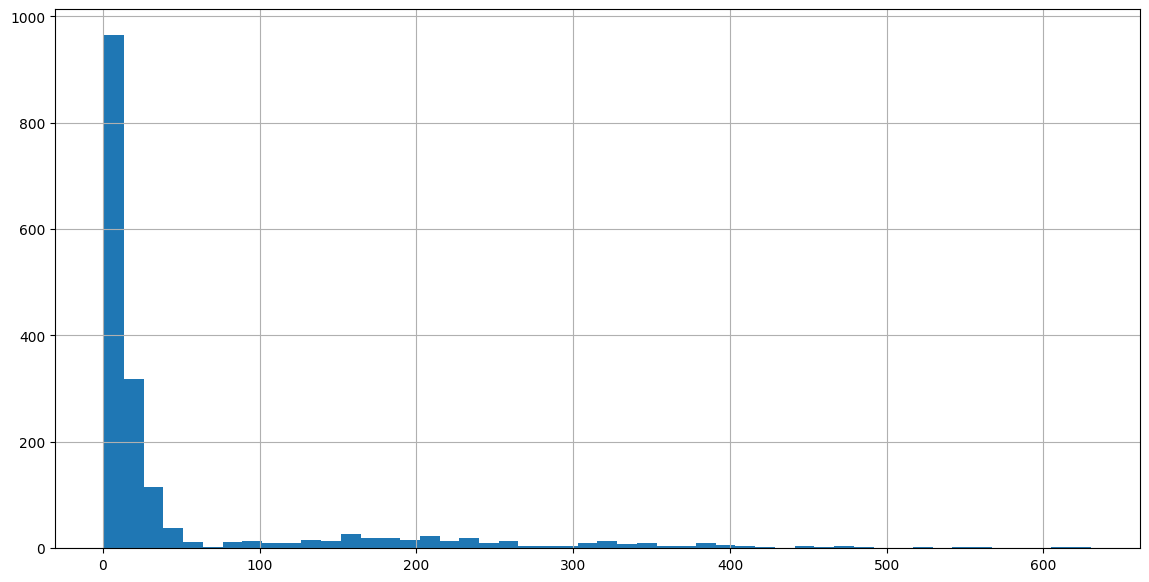

In [25]:
ad_costs['costs'].hist(figsize=(14, 7), bins=50);

Достаточно много значений, находящихся выше основного дипазона значений. С учетом наличия в датасете данных по рекламным компаниям в различных источниках привлечения, целесообразно построить диаграмму размаха с разбивкой по каналам привлечения.

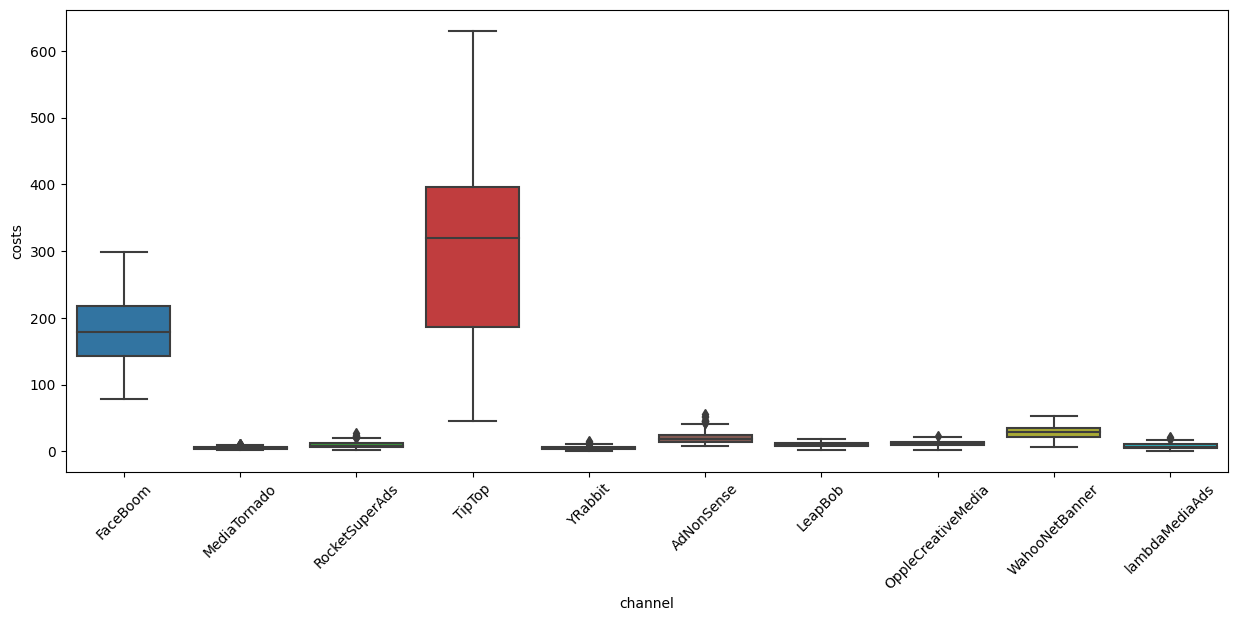

In [26]:
plt.figure(figsize=(15, 6))
sns.boxplot(x="channel", y="costs", data=ad_costs)
plt.xticks(rotation=45);

Как видно 2 канала привлечения существенно отличаются по затратам от других, однако не видно причин принимать данные значения за аномальные, т.к. удалив данные выше основного коридора значений мы потеряем данные по расходам на рекламу по 2м возможно основным каналам привлечения. Данные оставим без изменения.

**Вывод:** готовность данных к анализу высокая - нет пропусков и дубликатов, категориальные значения заданы без ошибок, временные интервалы соответствуют друг другу и условиям проекта, явных аномалий не вывлено, с учетом выполненных доработок (форматы даты и времени и наименования столбцов) данные готовы для аналитики.

## Функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Зададим функции для вычисления значений следующих метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

### Функция для создания профилей пользователей.

In [27]:
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

events = None

### Функция для подсчета Retention Rate.

In [28]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions = [],
    ignore_horizon = False,
):
    
    # решаем какие столбцы оставим для группировки удержания, столбец признака платящего пользователя остается всегда
    dimensions = ['payer'] + dimensions
    
    # оттсекаем всех пользователей, которые не могли "дожить" до нужного горизонта 
    # (присоединились позже чем observation_date - horizon)
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days = horizon_days - 1)
    retention_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # формируем массив сырых данных
    retention_raw = retention_raw.merge(sessions[['user_id', 'session_start']], on = 'user_id', how = 'left')
    retention_raw['lifetime'] = (retention_raw['session_start'] - retention_raw['first_ts']).dt.days
    
    # функция группировки по нужному набору измерений
    def group_by_dimensions(df, dims, horizon_days):     
        result = df.pivot_table(index = dims, columns = 'lifetime', values = 'user_id', aggfunc = 'nunique')     
        # строим "треугольную таблицу" 
        cohort_sizes = df.groupby(dims).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'cohort_size'}) 
        # определяем размеры когорт
        result = cohort_sizes.merge(result, on = dims, how = 'left').fillna(0)                                   
        # присоединяем размеры когорт к треугольной таблице
        result = result.div(result['cohort_size'], axis = 0)                                                     
        # делим каждый из столбцов на размер когорты - расчитываем % удержания (retention rate)
        result = result[['cohort_size'] + list(range(horizon_days))]                                             
        # оставляем только наблюдения до нужного горизонта и столбец размеров когорт
        result['cohort_size'] = cohort_sizes                                                                     
        # пересприсваиваем столбец размеров когорт, ведь во время деления он превратился в 1
        return result
    
    # расчитываем удержание 
    retention_grouped = group_by_dimensions(retention_raw, dimensions, horizon_days)
    
    # рассчитываем удержание по всем параметрам + дата
    retention_history = group_by_dimensions(retention_raw, dimensions + ['dt'], horizon_days)
    
    # возвращаем и таблицы удержания и сырые данные (чтобы в случае чего можно было в них покопаться при отладке)
    return retention_raw, retention_grouped, retention_history

### Функция для расчета конверсии.

In [29]:
def get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    conversion_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    conversion_raw = conversion_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    conversion_raw['lifetime'] = (
        conversion_raw['event_dt'] - conversion_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        conversion_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    conversion_grouped = group_by_dimensions(conversion_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    conversion_history = group_by_dimensions(
        conversion_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return conversion_raw, conversion_grouped, conversion_history


### Функция для подсчета LTV.

In [30]:
def get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    ltv_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    ltv_raw = ltv_raw.merge(
        orders[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    ltv_raw['lifetime'] = (
        ltv_raw['event_dt'] - ltv_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        ltv_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )
        roi = result.div(cac['cac'], axis=0)
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        roi['cohort_size'] = cohort_sizes
        roi['cac'] = cac['cac']
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        return result, roi

    ltv_grouped, roi_grouped = group_by_dimensions(
        ltv_raw, dimensions, horizon_days
    )
    if 'cohort' in dimensions:
        dimensions = []
    ltv_history, roi_history = group_by_dimensions(
        ltv_raw, dimensions + ['dt'], horizon_days
    )

    return (
        ltv_raw,  # сырые данные
        ltv_grouped,  # таблица LTV
        ltv_history,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_history,  # таблица динамики ROI
    )


### Функция для фильтрации данных перед их визуализацией.

In [31]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

### Функция для построения графика Retention Rate.

In [32]:
def plot_retention(retention_grouped, retention_history, horizon_days, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 12))

    # исключаем размеры когорт и удержание первого дня
    retention_grouped = retention_grouped.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon_days - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention_grouped.index.nlevels == 1:
        retention_grouped['cohort'] = 'All users'
        retention_grouped = retention_grouped.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention_grouped.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention_grouped.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon_days - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon_days
        )
    )

    # в четвёртой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon_days - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon_days
        )
    )
    
    plt.tight_layout()
    plt.show()

### Функция для построения графика конверсии.

In [33]:
def plot_conversion(conversion_grouped, conversion_history, horizon_days, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 7))

    # исключаем размеры когорт
    conversion_grouped = conversion_grouped.drop(columns=['cohort_size'])

    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon_days - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion_grouped.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon_days - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon_days))

    plt.tight_layout()
    plt.show()

### Функция для визуализации LTV и ROI

In [34]:
def plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon, window):

    plt.figure(figsize=(20, 15))

    ltv_grouped = ltv_grouped.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
    cac_history = roi_history[['cac']]
    roi_grouped = roi_grouped.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]
    
    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv_grouped.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi_grouped.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Исследовательский анализ данных

- Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.
- Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей.
- Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи.
- Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей.

После каждого пункта сформулируем выводы.

### Профили пользователей.

Сформируем датасет с профилями пользователей с помощью заданной функции get_profiles().

In [35]:
profiles = get_profiles(sessions, orders, events, ad_costs)
profiles.head()

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769

Определим минимальную и максимальную даты привлечения пользователей.

In [36]:
min_atr_date = profiles['first_ts'].min().date()
print("минимальная дата привлечения", min_atr_date)

минимальная дата привлечения 2019-05-01


In [37]:
max_atr_date = profiles['first_ts'].max().date()
print("максимальная дата привлечения", max_atr_date)

максимальная дата привлечения 2019-10-27


В соответствие с условием проекта "на календаре 1 ноября 2019 года", а т.к. максимальная дата в датасете 27 октября момент анализа не может равняться 1 ноября. Принимаем за момент анализа 27 октября с горизонтом анализа 14 дней (по условию проекта). 

### Распределение пользователей по странам.

Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей.

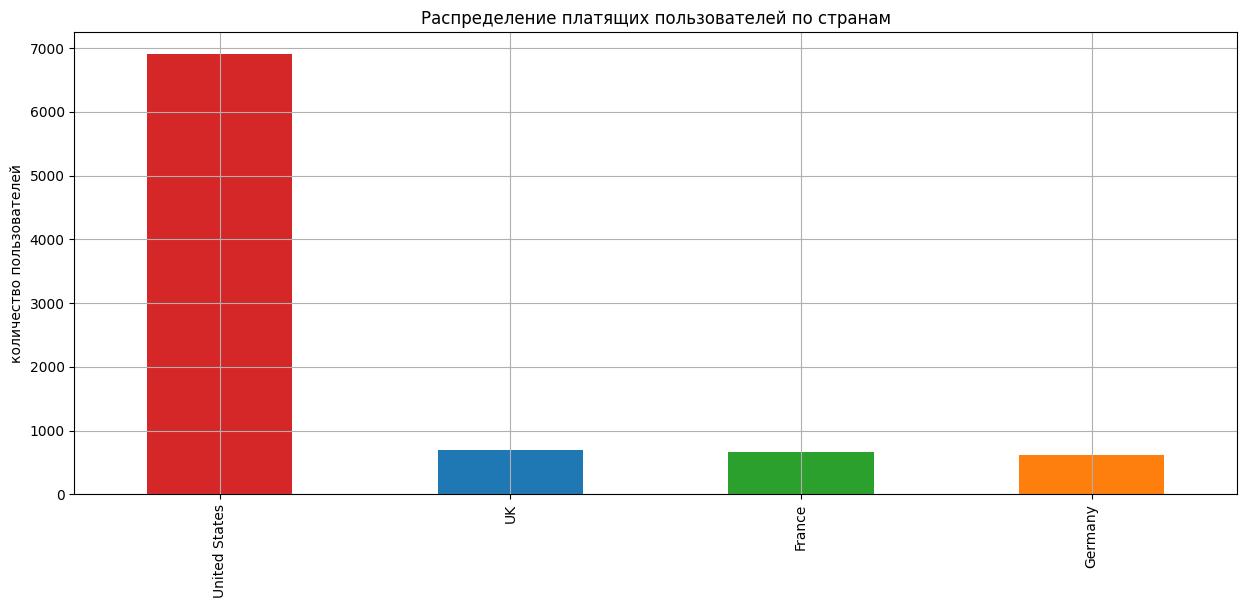

In [38]:
plt.figure(figsize=(15, 6))
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']
(
    profiles.query('payer == True')
    .groupby('region')['user_id'].count()
    .sort_values(ascending=False)
    .plot(grid=True, kind='bar', color=bar_colors, tick_label='user_id')
)
plt.xlabel('')
plt.ylabel('количество пользователей')
plt.title('Распределение платящих пользователей по странам');

Основная масса платящих пользователей 77.7% сосредоточена в США:

In [39]:
users = (
                profiles.pivot_table(
                                    index='region',
                                    values='user_id',
                                    aggfunc='count',
                                    columns='payer',
                                    margins=True)
                .sort_values(by='All', ascending=False)
                .reset_index()
)
users.columns = ['Регион', 'Не платят', 'Платят', 'Всего']
users['Доля региона для всех в %'] = (users['Всего'] / users['Всего'].max()*100).round(1)
users['Доля региона для платящих в %'] = (users['Платят'] / users['Платят'].max()*100).round(1)
users['Доля платящих в % для региона'] = (users['Платят'] / users['Всего']*100).round(1)
users

Регион  Не платят  Платят   Всего  Доля региона для всех в %  \
0            All     141127    8881  150008                      100.0   
1  United States      93100    6902  100002                       66.7   
2             UK      16875     700   17575                       11.7   
3         France      16787     663   17450                       11.6   
4        Germany      14365     616   14981                       10.0   

   Доля региона для платящих в %  Доля платящих в % для региона  
0                          100.0                            5.9  
1                           77.7                            6.9  
2                            7.9                            4.0  
3                            7.5                            3.8  
4                            6.9                            4.1

### Устройства пользователей.

Посмотрим какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи.

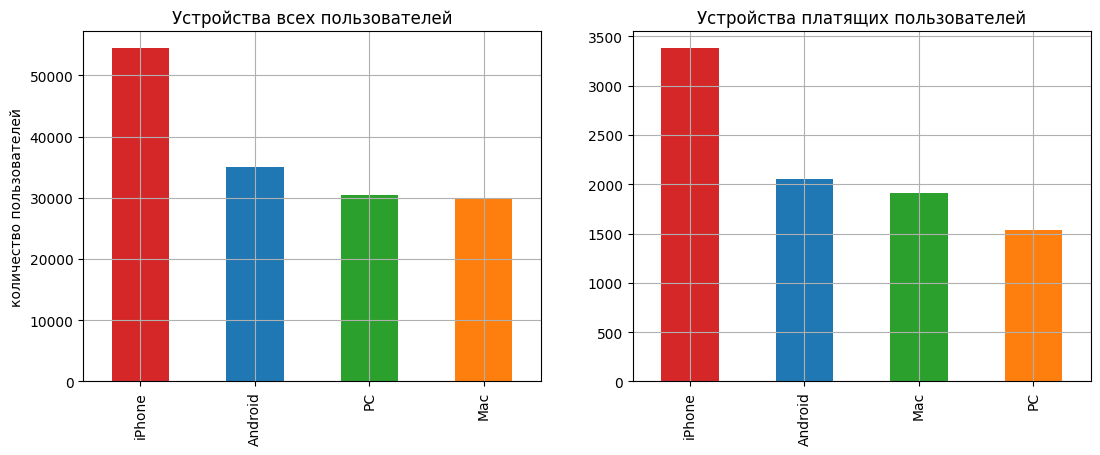

In [40]:
plt.figure(figsize=(13, 10))
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']
ax1 = plt.subplot(2, 2, 1)
(
    profiles.groupby('device')['user_id'].count()
    .sort_values(ascending=False)
    .plot(grid=True, kind='bar', color=bar_colors, tick_label='user_id')
)
plt.xlabel('')
plt.ylabel('количество пользователей')
plt.title('Устройства всех пользователей')

ax2 = plt.subplot(2, 2, 2)
(
    profiles.query('payer == True')
    .groupby('device')['user_id'].count()
    .sort_values(ascending=False)
    .plot(grid=True, kind='bar', color=bar_colors, tick_label='user_id')
)
plt.xlabel('')
plt.ylabel('')
plt.title('Устройства платящих пользователей');

Лидер - iphone. При этом среди платящих пользователей распределение немного иное - устройств Mac больше, чем обычных PC.
Чтобы посмотреть на распределение более качественно постройм таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [41]:
users_devices = (
                profiles.pivot_table(
                                    index='device',
                                    values='user_id',
                                    aggfunc='count',
                                    columns='payer',
                                    margins=True)
                .sort_values(by='All', ascending=False)
                .reset_index()
)
users_devices.columns = ['Вид устройства', 'Не платят', 'Платят', 'Всего']
users_devices['Доля вида устройства для всех в %'] = (users_devices['Всего'] / users_devices['Всего'].max()*100).round(1)
users_devices['Доля вида устройства для платящих в %'] = (users_devices['Платят'] / users_devices['Платят'].max()*100).round(1)
users_devices['Доля платящих в % для вида устройства'] = (users_devices['Платят'] / users_devices['Всего']*100).round(1)
users_devices

Вид устройства  Не платят  Платят   Всего  \
0            All     141127    8881  150008   
1         iPhone      51097    3382   54479   
2        Android      32982    2050   35032   
3             PC      28918    1537   30455   
4            Mac      28130    1912   30042   

   Доля вида устройства для всех в %  Доля вида устройства для платящих в %  \
0                              100.0                                  100.0   
1                               36.3                                   38.1   
2                               23.4                                   23.1   
3                               20.3                                   17.3   
4                               20.0                                   21.5   

   Доля платящих в % для вида устройства  
0                                    5.9  
1                                    6.2  
2                                    5.9  
3                                    5.0  
4                                    6.4

38.1% платящих пользователей имеют Iphone. Доля платящих пользователей составляет около 6%, более платежеспособны владельцы Mac'ов и Iphone, наименее - владельцы обычных PC, что в целом ожидаемо.

### Рекламные источники привлечения.

Посмотрим на рекламные источники привлечения, определим каналы, из которых пришло больше всего платящих пользователей.

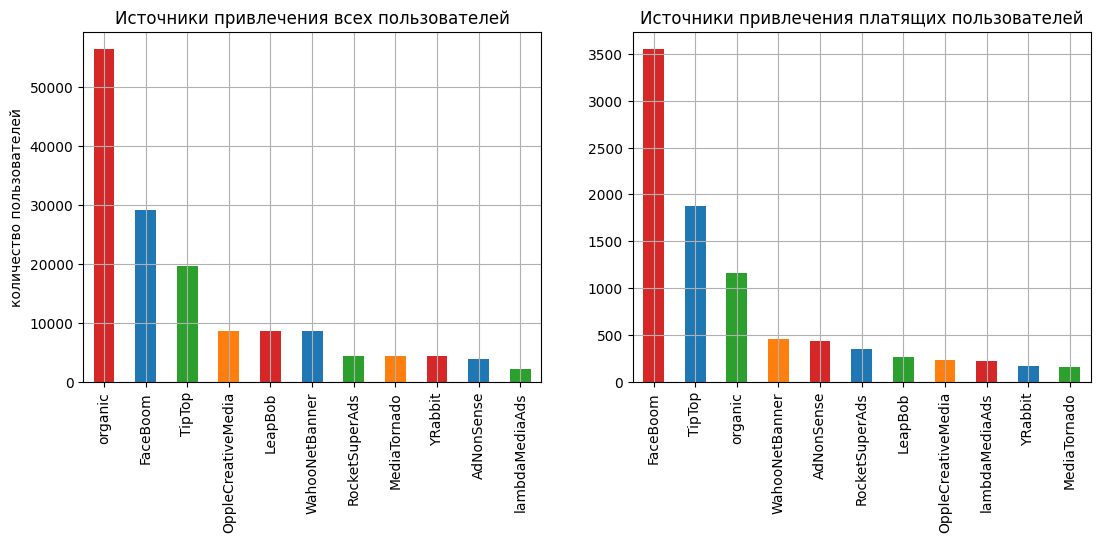

In [42]:
plt.figure(figsize=(13, 10))
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']
ax1 = plt.subplot(2, 2, 1)
(
    profiles.groupby('channel')['user_id'].count()
    .sort_values(ascending=False)
    .plot(grid=True, kind='bar', color=bar_colors)
)
plt.xlabel('')
plt.ylabel('количество пользователей')
plt.title('Источники привлечения всех пользователей')

ax2 = plt.subplot(2, 2, 2)
(
    profiles.query('payer == True')
    .groupby('channel')['user_id'].count()
    .sort_values(ascending=False)
    .plot(grid=True, kind='bar', color=bar_colors)
)
plt.xlabel('')
plt.ylabel('')
plt.title('Источники привлечения платящих пользователей');

В целом пользователи приходят сами (больше трети всех пользователей "органические"). Однако основной канал привлечения платящих пользователей отличается, более трети платящих пользователей обеспечивает FaceBoom (около 3500 тыс.), на втором месте TipTop и только чуть больше тысячи пользователей пришли сами.

Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [43]:
users_channels = (
                profiles.pivot_table(
                                    index='channel',
                                    values='user_id',
                                    aggfunc='count',
                                    columns='payer')
                .reset_index()
)
users_channels.columns = ['Канал привлечения', 'Не платят', 'Платят']
users_channels['Доля платящих в %'] = (
                                    (users_channels['Платят'] /
                                    (users_channels['Платят'] + users_channels['Не платят'])*100).round(1)
)
   
users_channels.sort_values(by='Доля платящих в %', ascending=False).reset_index(drop=True)

Канал привлечения  Не платят  Платят  Доля платящих в %
0             FaceBoom      25587    3557               12.2
1           AdNonSense       3440     440               11.3
2       lambdaMediaAds       1924     225               10.5
3               TipTop      17683    1878                9.6
4       RocketSuperAds       4096     352                7.9
5       WahooNetBanner       8100     453                5.3
6              YRabbit       4147     165                3.8
7         MediaTornado       4208     156                3.6
8              LeapBob       8291     262                3.1
9   OppleCreativeMedia       8372     233                2.7
10             organic      55279    1160                2.1

На самом деле среди пользователей, которые приходят сами ("органические"), меньше всего % платящих (2,1%). Наибольшую долю платящих клиентов в разрезе каналов привлечения обеспечивает реклама в FaceBoom, AdNonSense, lambdaMediaAds и TipTop.

**Вывод:**

- основная масса платящих пользователей 77.7% сосредоточена в США,
- доля платящих пользователей не велика - в среднем около 6%, 38.1% платящих пользователей имеют Iphone (самый распространенный вид устройств)
- наибольшую долю платящих клиентов в разрезе каналов привлечения обеспечивает FaceBoom, AdNonSense, lambdaMediaAds и TipTop.

## Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

### Общие рекламные расходы.

Посчитаем общую сумму рекладных расходов.

In [44]:
print('общая сумма расходов на рекламу', ad_costs['costs'].sum().round(1))

общая сумма расходов на рекламу 105497.3


Проверим сходятся ли данные с результатом работы функции get_profiles(), сумма значений по столбцу acquisition_cost должна равняться вышеуказанной сумме.

In [45]:
profiles['acquisition_cost'].sum().round(1)

105497.3

Верно.

### Распределение рекламных расходов по источникам.

Посмотрим сколько денег потратили на рекламу на каждый источник привлечения пользователей.

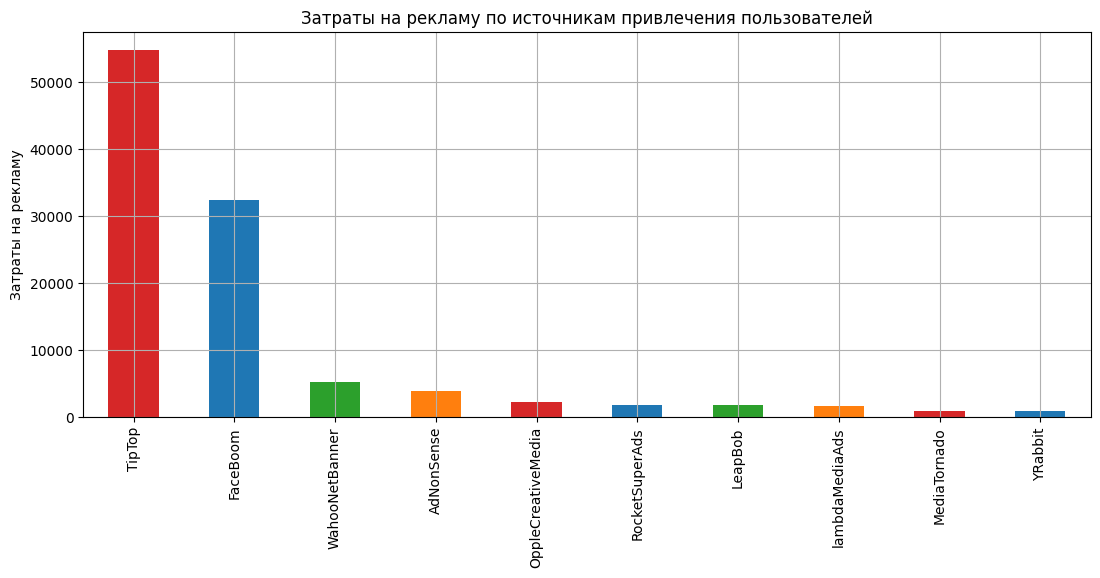

In [46]:
plt.figure(figsize=(13, 5))
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']

(
    ad_costs.groupby('channel')['costs'].sum()
    .sort_values(ascending=False)
    .plot(grid=True, kind='bar', color=bar_colors)
)
plt.xlabel('')
plt.ylabel('Затраты на рекламу')
plt.title('Затраты на рекламу по источникам привлечения пользователей');

In [47]:
channel_ad_costs = (
    ad_costs.pivot_table(values='costs', index='channel', aggfunc='sum', margins=True).sort_values(by='costs', ascending=False).reset_index()
)
channel_ad_costs.columns = ["Канал привлечения", "Затраты на рекламу"]
channel_ad_costs['Доля от общих затрат в %'] = (channel_ad_costs["Затраты на рекламу"] / channel_ad_costs["Затраты на рекламу"].max()*100).round(1)
channel_ad_costs

Канал привлечения  Затраты на рекламу  Доля от общих затрат в %
0                  All           105497.30                     100.0
1               TipTop            54751.30                      51.9
2             FaceBoom            32445.60                      30.8
3       WahooNetBanner             5151.00                       4.9
4           AdNonSense             3911.25                       3.7
5   OppleCreativeMedia             2151.25                       2.0
6       RocketSuperAds             1833.00                       1.7
7              LeapBob             1797.60                       1.7
8       lambdaMediaAds             1557.60                       1.5
9         MediaTornado              954.48                       0.9
10             YRabbit              944.22                       0.9

Не смотря на самые большие затраты на рекламу в TipTop, данный канал привлечения пользователей не привлекает больше всего пользователей, значит эффективность рекламы здесь можно поставить под сомнение, чего не скажешь о FaceBoom и WahooNetBanner.

Посмотрим на динамику рекламных расходов во времени по месяцам и неделям.

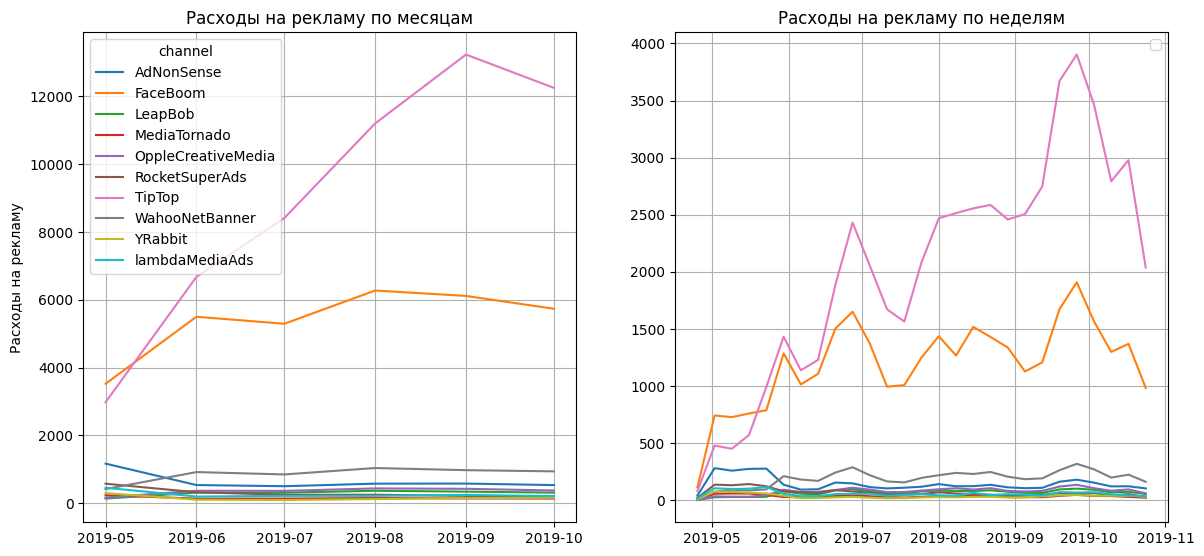

In [48]:
ad_costs['dt_month'] = ad_costs['dt'].astype('datetime64[M]')
ad_costs['dt_week'] = ad_costs['dt'].astype('datetime64[W]')

plt.figure(figsize=(14, 14))
data1 = ad_costs.groupby(['channel', 'dt_month']).sum().reset_index()
ax1 = plt.subplot(2, 2, 1)
sns.lineplot(x="dt_month", y="costs", hue="channel", data=data1)
ax1.set_xlabel('')
ax1.set_ylabel('Расходы на рекламу')
ax1.set_title('Расходы на рекламу по месяцам')
ax1.grid(True)

data2 = ad_costs.groupby(['channel', 'dt_week']).sum().reset_index()
ax2 = plt.subplot(2, 2, 2)
sns.lineplot(x="dt_week", y="costs", hue="channel", data=data2)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.legend('')
ax2.set_title('Расходы на рекламу по неделям')
ax2.grid(True);

Как видим на рекламу в TipTop тратится в несколько раз больше денег, при этом динамика расходов такова, что расходы со временем всё увеличиваются, расходы на рекламу в FaceBoom тоже существенные по сравнению с остальными каналами, однако больше всего платящих пользователей привлекают именно эти каналы. Посчитаем средний CAC для каждого канала привлечения.

<a id='another_cell'></a>

<Figure size 640x480 with 0 Axes>

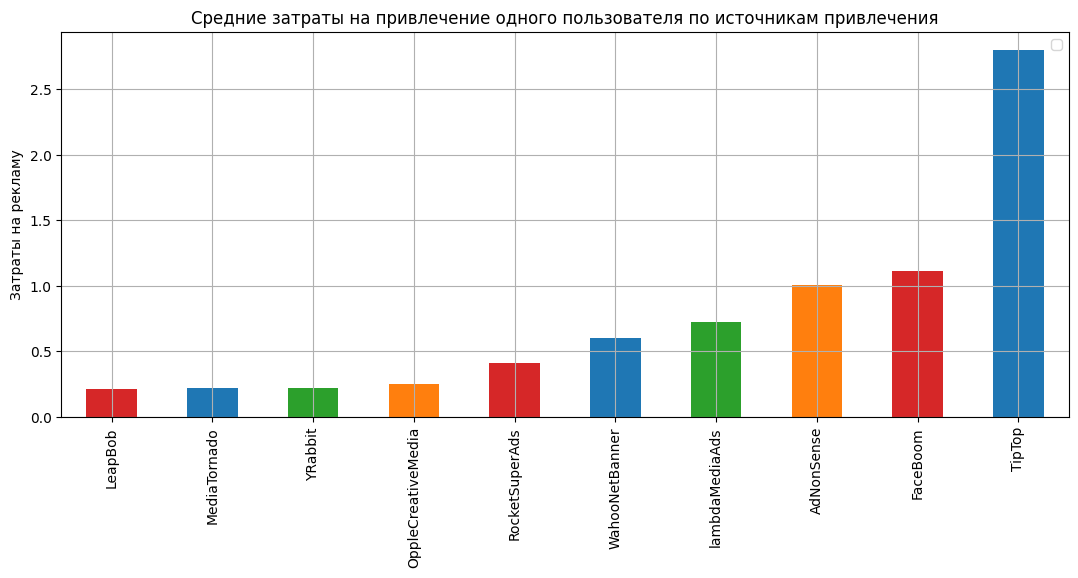

In [49]:
payers = (
        profiles.query('channel not in "organic"').groupby('channel')['user_id'].count()
        .reset_index().sort_values(by='channel')
)
channel_ads_costs = (
        profiles.query('channel not in "organic"').groupby('channel')['acquisition_cost'].sum()
        .reset_index().sort_values(by='channel')
)

channel_ads_costs['CAC'] = channel_ads_costs['acquisition_cost']/payers['user_id']
plt.figure()
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']

channel_ads_costs.sort_values(by='CAC').plot(x='channel', y='CAC', grid=True, kind='bar', figsize=(13, 5), color=bar_colors)
plt.legend('')
plt.xlabel('')
plt.ylabel('Затраты на рекламу')
plt.title('Средние затраты на привлечение одного пользователя по источникам привлечения');

Как видим на рекламу в TipTop в среднем тратится в 2-3 раза больше денег, однако больше всего платящих пользователей привлекает не этот канал привлечения. Гораздо лучше обстоят дела у FeceBoom, однако и данный канал не является лидером по "стоимости" привлечения платящих пользователей. Самая низкая стоимость привлечения пользователей в LeapBob, MediaTornado и YRabbit.

Повторим данные расчеты только для платящих пользователей, ведь они для нас самые важные.

<a id='another_cell'></a>

<Figure size 640x480 with 0 Axes>

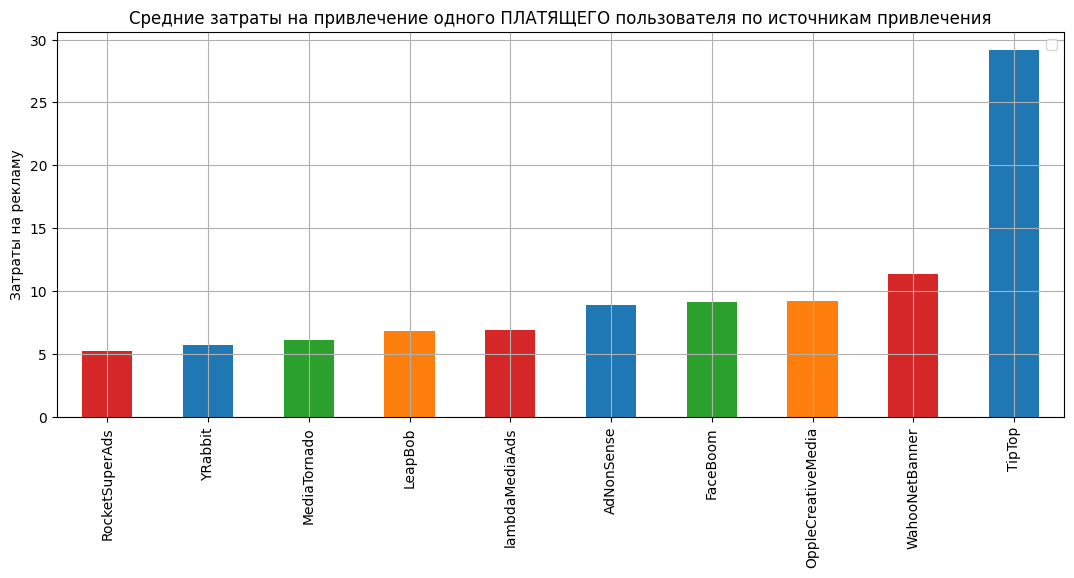

In [50]:
payers = (
        profiles.query('channel not in "organic" & payer == True').groupby('channel')['user_id'].count()
        .reset_index().sort_values(by='channel')
)
channel_ads_costs = (
        profiles.query('channel not in "organic"').groupby('channel')['acquisition_cost'].sum()
        .reset_index().sort_values(by='channel')
)

channel_ads_costs['CAC'] = channel_ads_costs['acquisition_cost']/payers['user_id']
plt.figure()
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']

channel_ads_costs.sort_values(by='CAC').plot(x='channel', y='CAC', grid=True, kind='bar', figsize=(13, 5), color=bar_colors)
plt.legend('')
plt.xlabel('')
plt.ylabel('Затраты на рекламу')
plt.title('Средние затраты на привлечение одного ПЛАТЯЩЕГО пользователя по источникам привлечения');

Распределение немного иное, но с TipTop и здесь дела обстоят плохо. Самая низкая стоимость привлечения платящих пользователей в RockeSuperAds, YRabbit и MediaTornado.

**Вывод:**

- самые большие затраты на рекламу в TipTop (52% всех затрат) и FaceBoom (31% всех затрат),
- затраты на рекламу в TipTop постоянно растут, затраты на рекламу в FaceBoom стабильно высокие,
- самый высокий САС в каналах привлечения TipTop и FaceBoom (с учетом огромных трат на рекламу),
- самая низкая стоимость привлечения платящих пользователей в RockeSuperAds, YRabbit и MediaTornado.

## Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

### Анализ окупаемости рекламы в целом.

Построим графики LTV, CAC и ROI с помощью ранее заданных функций get_ltv() и plot_ltv_roi(), при этом удалим из профилей "органических" пользователей поскольку мы за них ничего не платим, а нам нужно изучить именно окупаемость рекламы.

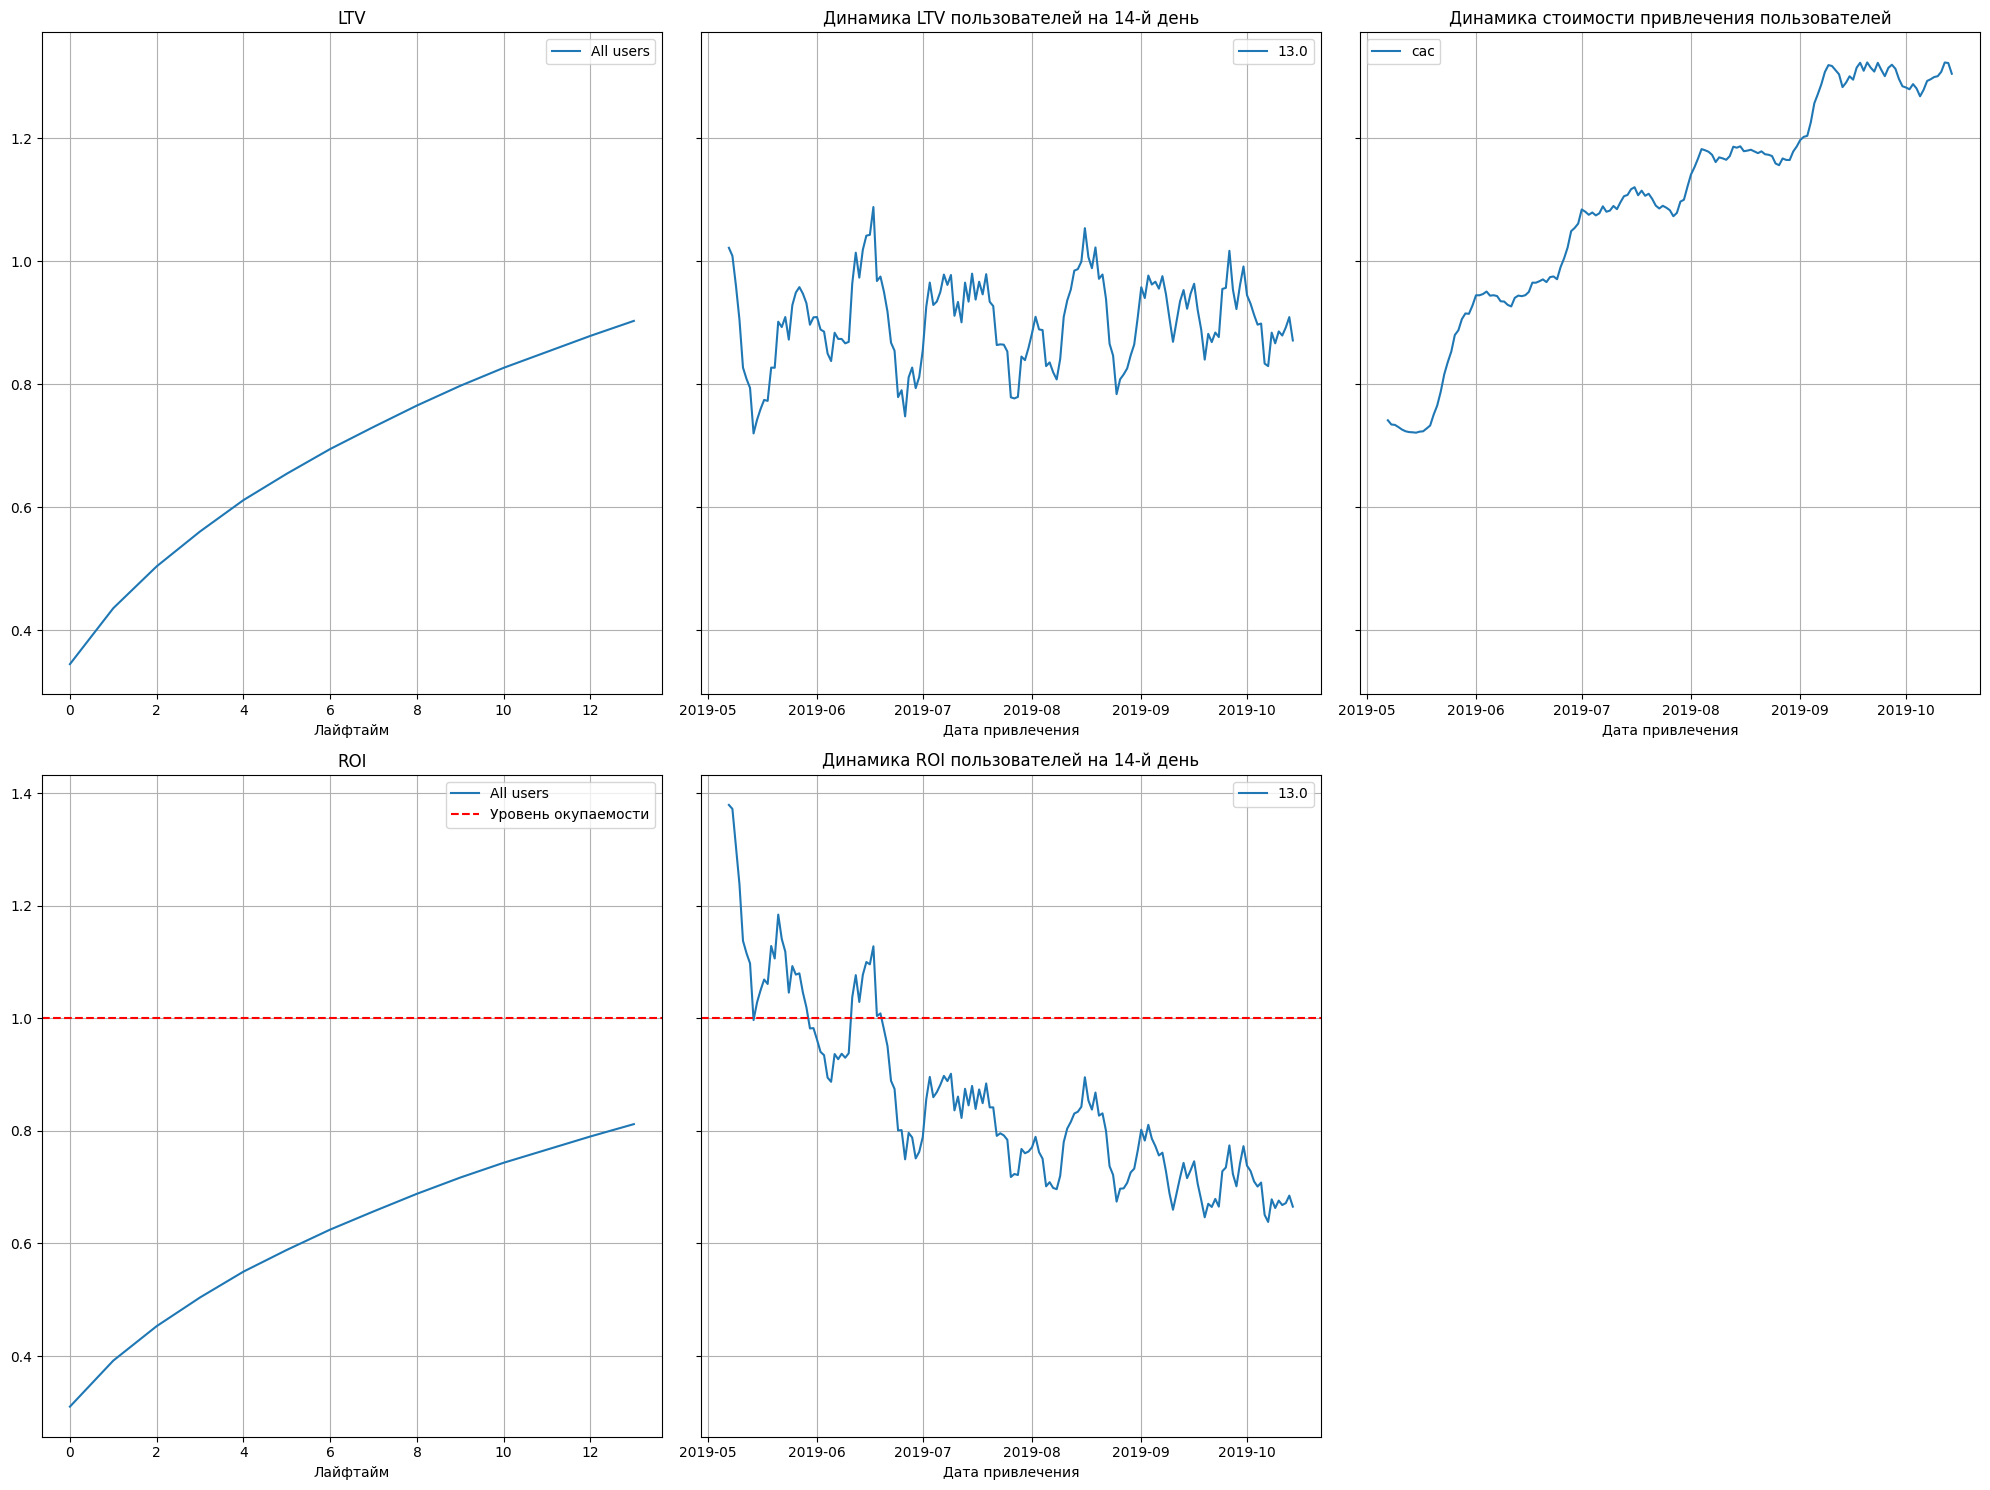

In [51]:
observation_date = max_atr_date
horizon_days = 14
profiles = profiles.query('channel != "organic"')
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, horizon_days)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7)

**По графикам можно сделать следующие выводы:**

- Реклама не достигает безубыточности к концу двухнедельного периода, динамика ROI в течение времени сильно снижается и находится в основном ниже уровня окупаемости, что вероятно не позволит выйти в плюс графику ROI.

- CAC сильно растет, вероятно, всё дело в увеличении рекламного бюджета.

- LTV достаточно стабилен, значит, дело не в ухудшении качества пользователей.

### Конверсия и удержание пользователей.

**Посмотрим на конверсию пользователей и динамику ее изменения во времени.**

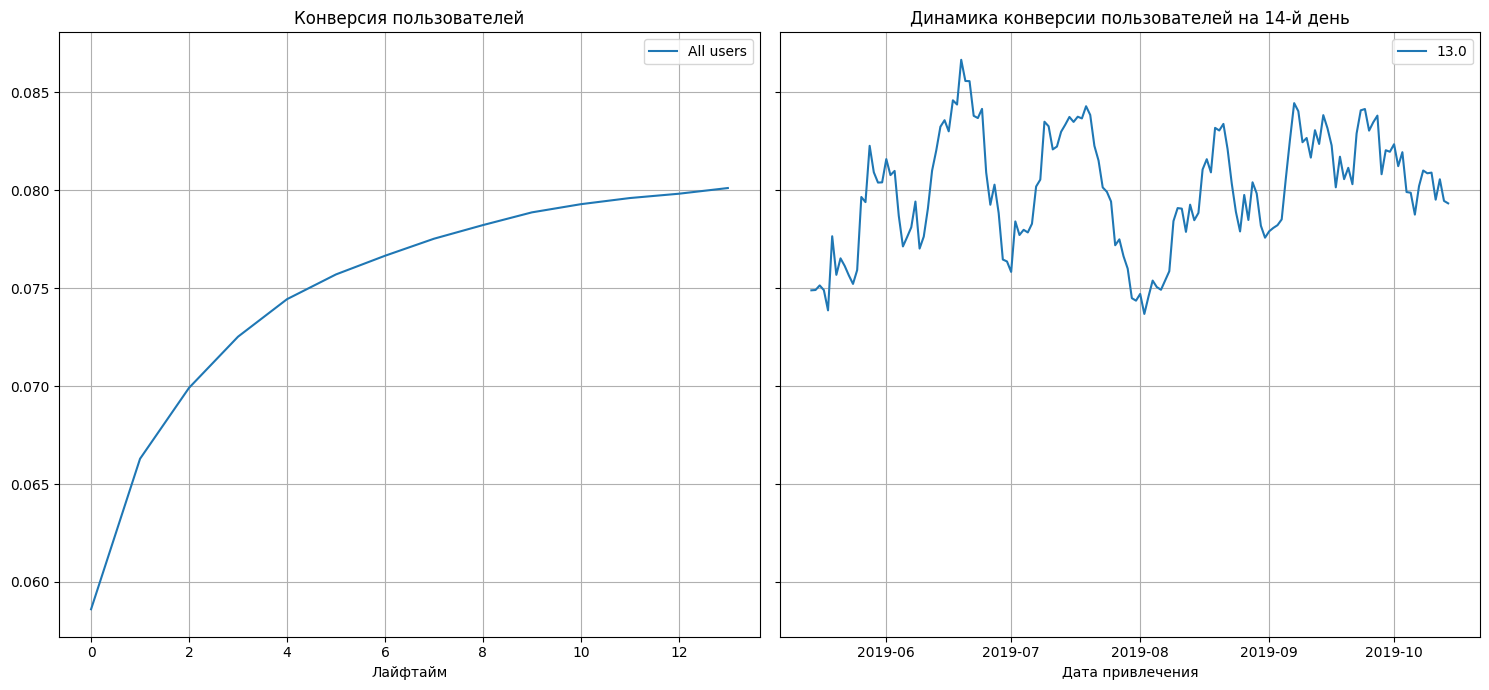

In [52]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, orders, observation_date, horizon_days)
plot_conversion(conversion_grouped, conversion_history, horizon_days, window=14)

- присутствует динамичный рост конверсии в первый месяц.
- конверсия в последние 3 месяца относительно стабильная.

Определим причины динамичного роста конверсии в первый месяц. Зададим в параметр dimensions поочереди регион, тип устройства, а затем канал привлечения. 

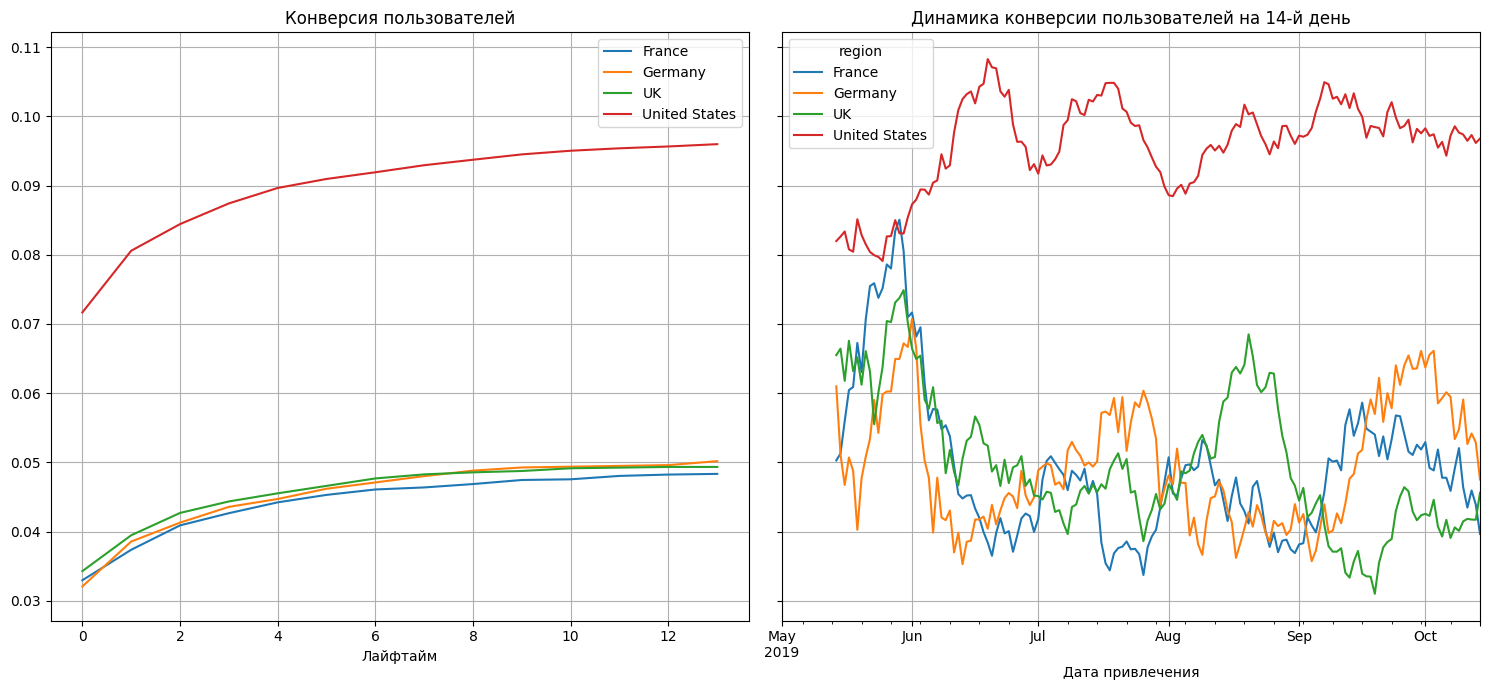

In [53]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, orders, observation_date, horizon_days, dimensions=['region'])
plot_conversion(conversion_grouped, conversion_history, horizon_days, window=14)

Очевидно, что пользователи из США обеспечили взывной рост конверсии в первый месяц. Посмотрим к пользователям каких устройств это относится.

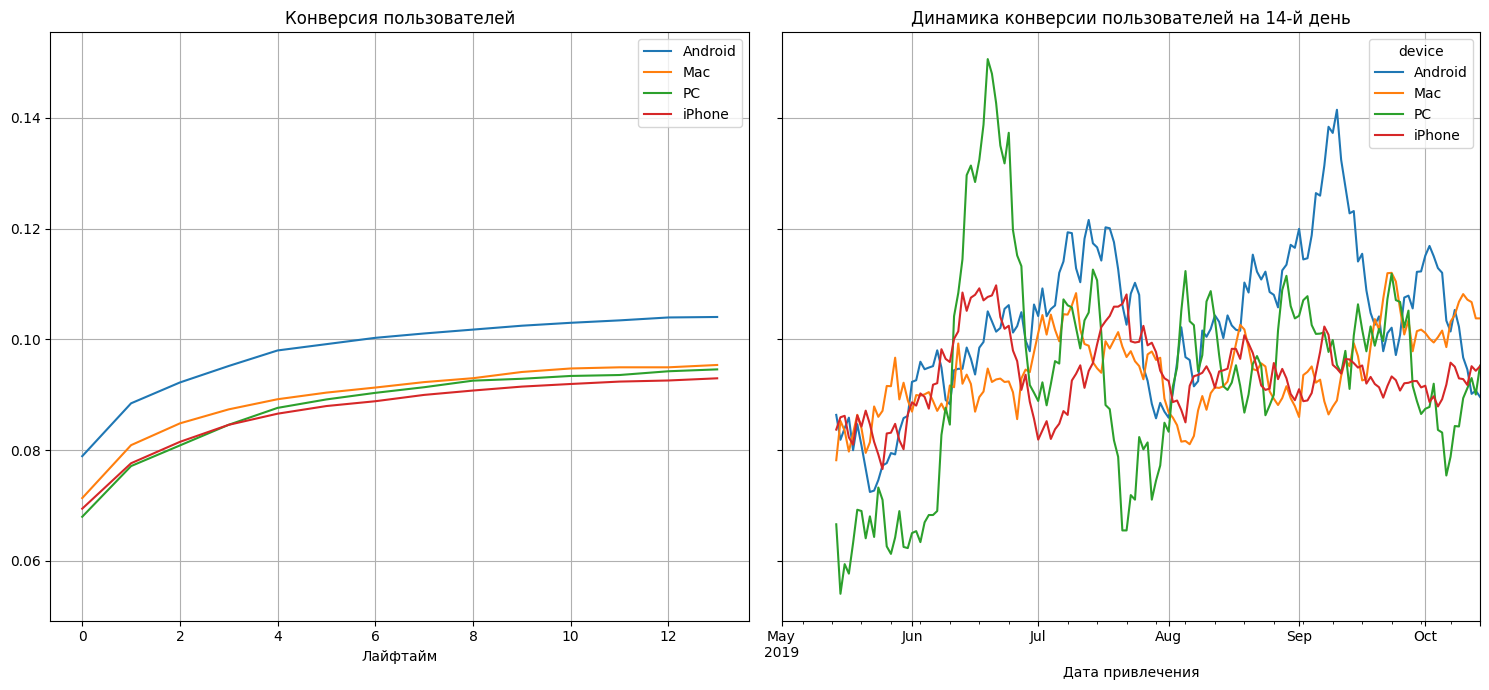

In [54]:
profiles_usa = profiles.query('region == "United States"')
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles_usa, orders, observation_date, horizon_days, dimensions=['device'])
plot_conversion(conversion_grouped, conversion_history, horizon_days, window=14)

Конверсия в США стремительно росла в первый месяц по всем фронтам, однако наибольший вклад в рост конверсии в первый месяц внесли пользователи обычных РС. Посмотрим благодаря каким рекламным каналам обеспечивался рост конверсии в первый месяц.

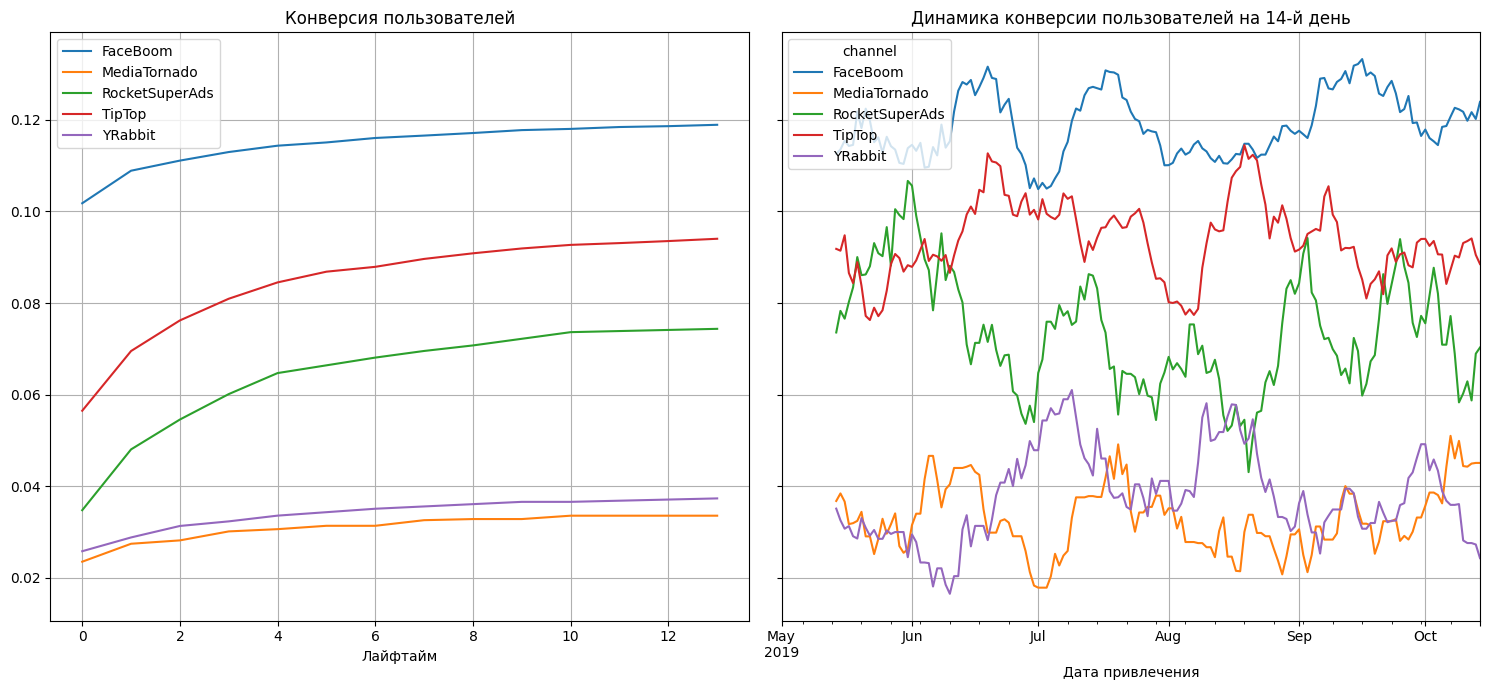

In [55]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles_usa, orders, observation_date, horizon_days, dimensions=['channel'])
plot_conversion(conversion_grouped, conversion_history, horizon_days, window=14)

Реклама в FaceBoom, TipTop и RocketSuperAds обеспечила основной вклав в конверсию пользователей, затем конверсия пользователей, привлеченных RocketSuperAds существенно снизилась, что компенсировалось стабильно высокой конверсией  пользователей, привлеченных из FaceBoom и TipTop.

**Проверим удержание пользователей.**

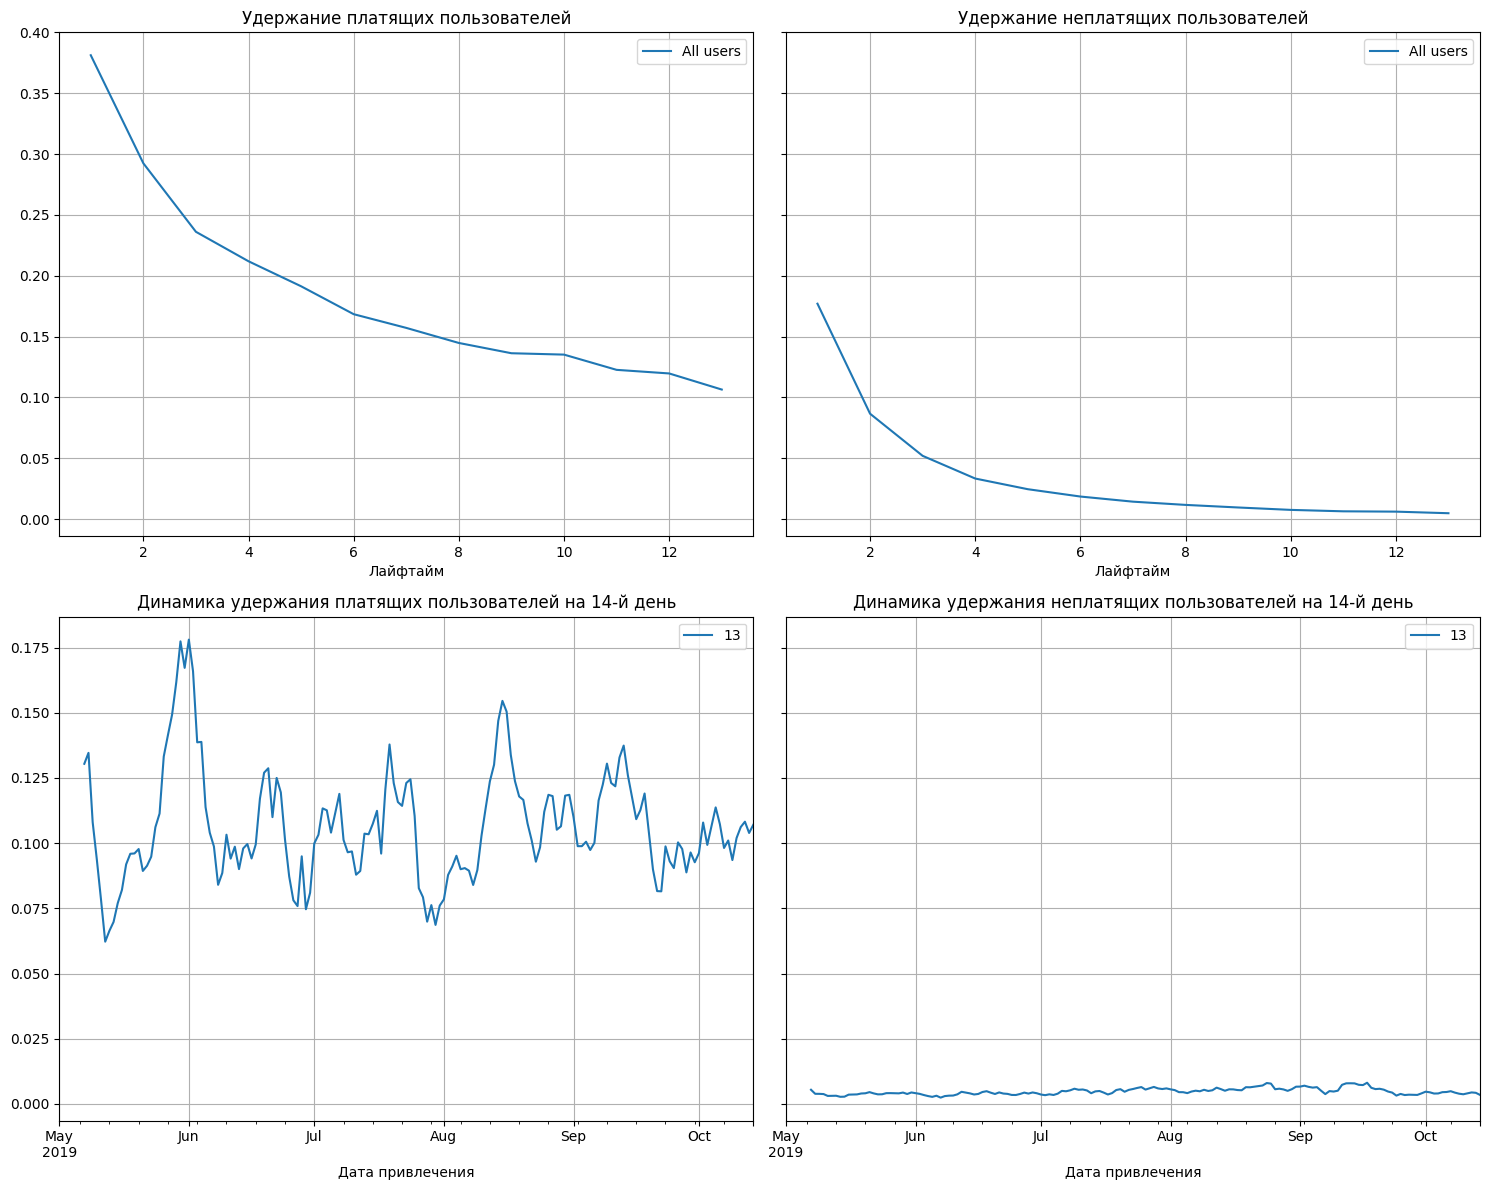

In [56]:
retention_raw, retention_grouped, retention_history = get_retention(profiles, sessions, observation_date, horizon_days)
plot_retention(retention_grouped, retention_history, horizon_days, window=7)

- удержание платящих пользователей выше, чем неплатящих, что логично.
- динамика удержания в целом стабильная, пристутвует процесс небольшой стагнации показателя для платящих пользователей, но несущественный.

Посмотрим как удержание изменяется по категориям пользователей. По странам.

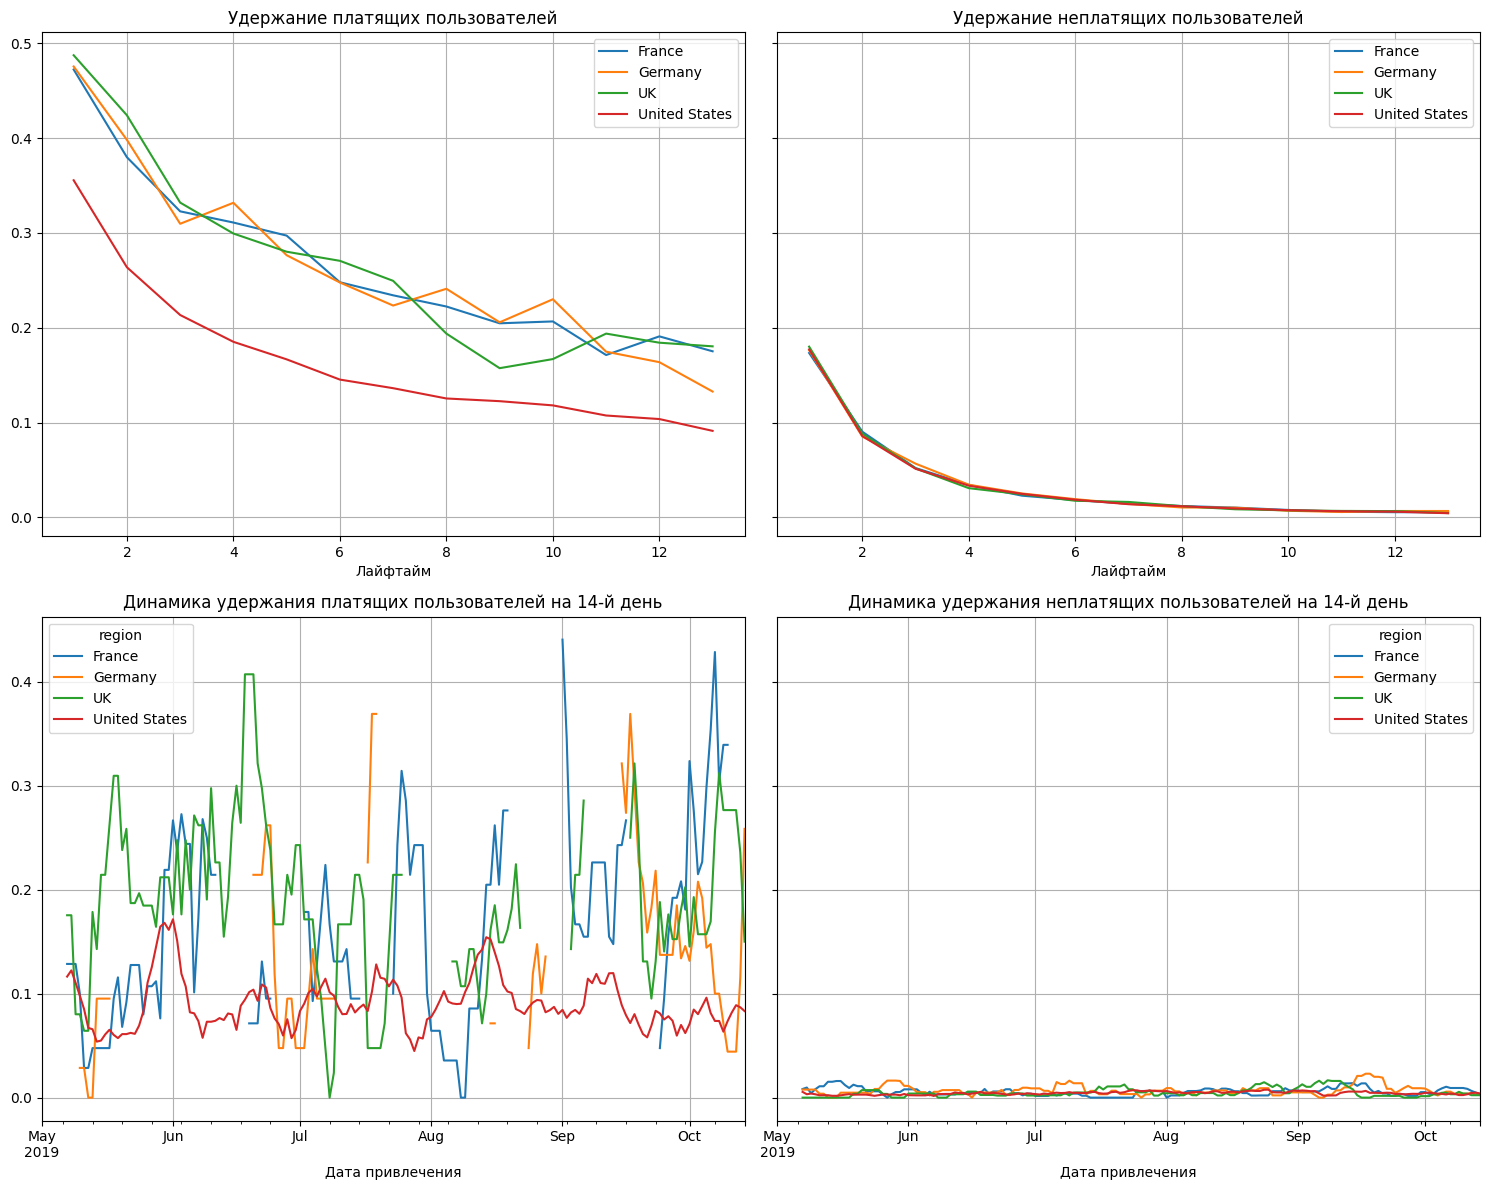

In [57]:
retention_raw, retention_grouped, retention_history = get_retention(profiles, sessions, observation_date, horizon_days, dimensions=['region'])
plot_retention(retention_grouped, retention_history, horizon_days, window=7)

- удержание платящих пользователей из США самое низкое, остальные существенно друг от друга сильно не отличаются.

Посмотрим как дела с удержанием пользователей в США по видам устройств.

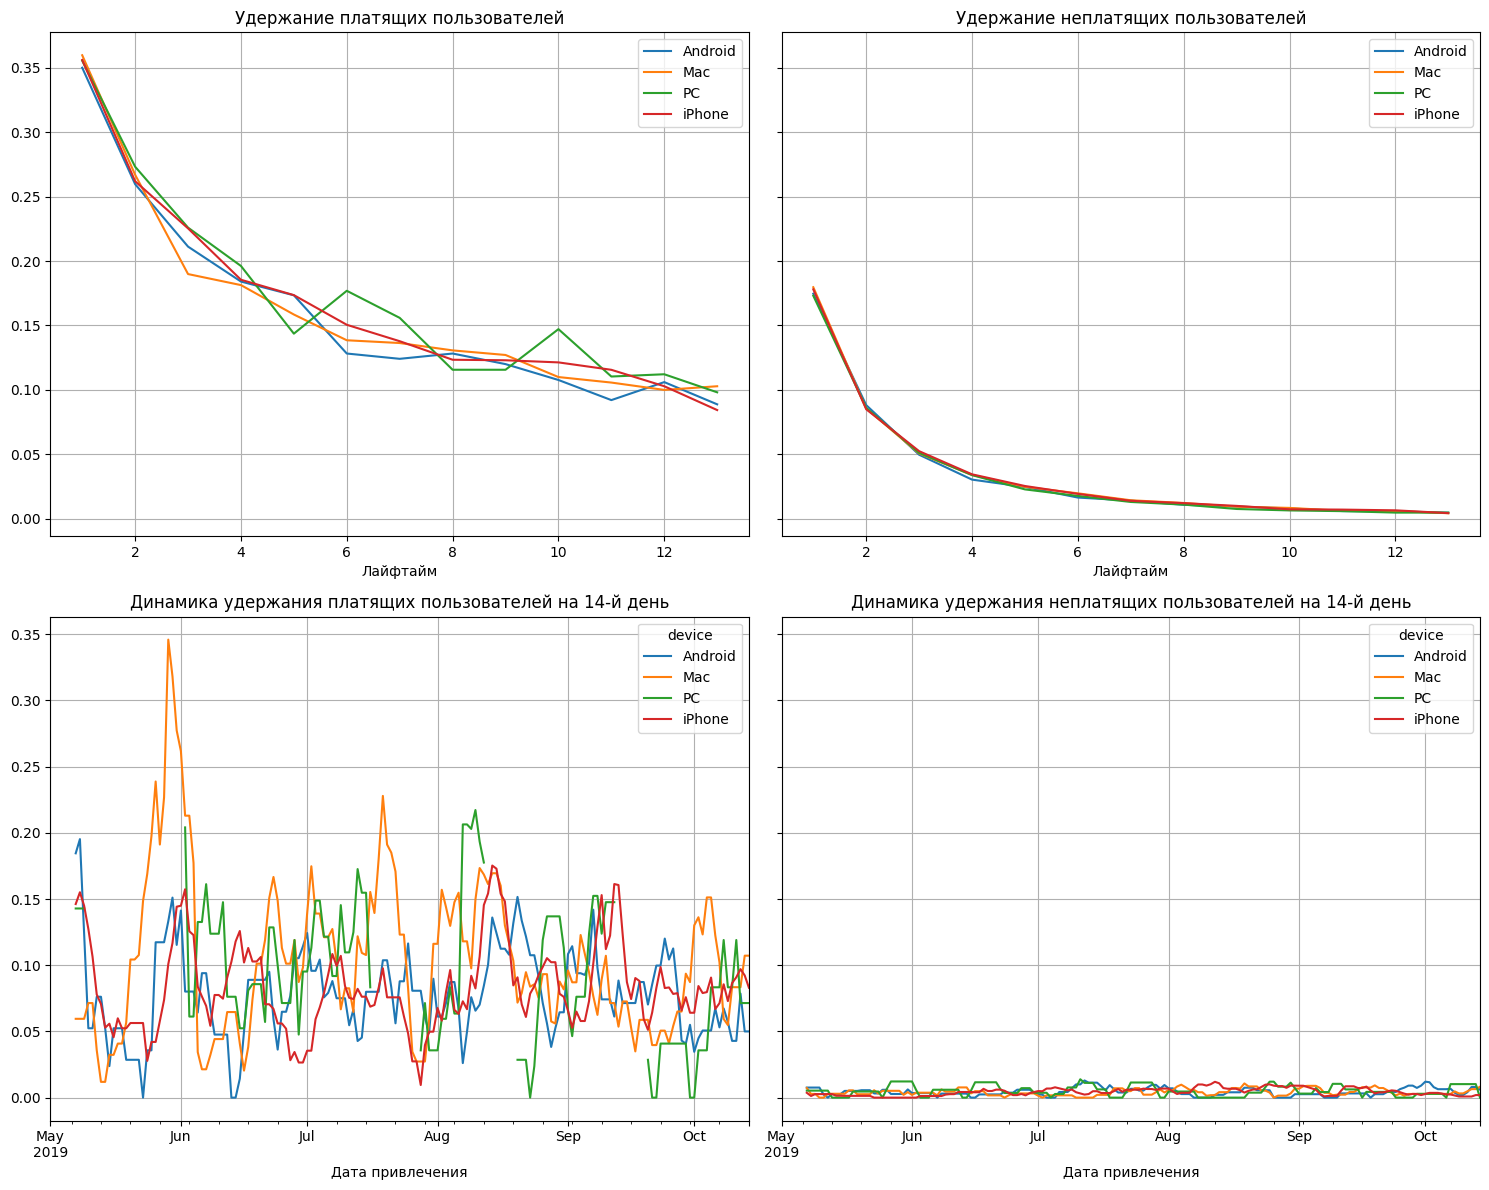

In [58]:
retention_raw, retention_grouped, retention_history = get_retention(profiles_usa, sessions, observation_date, horizon_days, dimensions=['device'])
plot_retention(retention_grouped, retention_history, horizon_days, window=7)

По каналам привлечения.

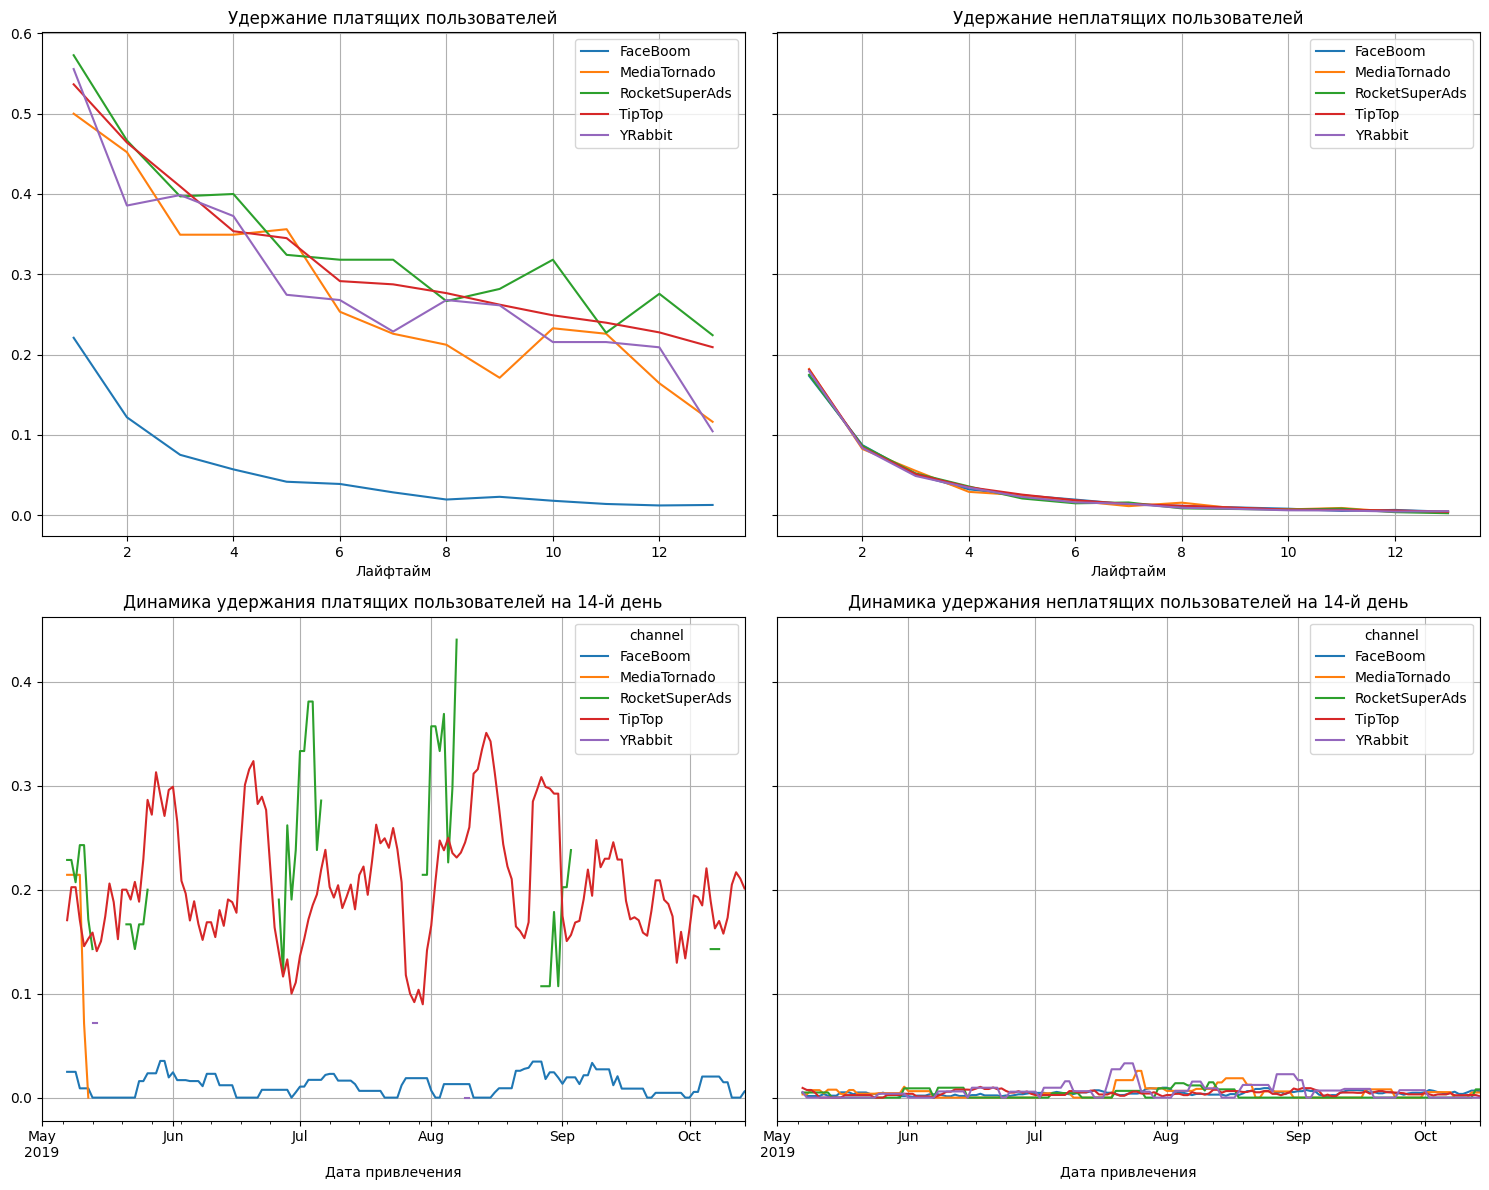

In [59]:
retention_raw, retention_grouped, retention_history = get_retention(profiles_usa, sessions, observation_date, horizon_days, dimensions=['channel'])
plot_retention(retention_grouped, retention_history, horizon_days, window=7)

- удержание по видам устройств пользователей друг от друга сильно не отличается.
- удержание пользователей из FaceBoom самое низкое - **проблема**.

### Анализ окупаемости рекламы по категориям пользователей.

Из графиков ROI и CAC ранее мы увидели, что с окупаемостью рекламы проблемы. Посмотрим поочереди с какими категориями пользователей необходимо работать. Зададим в параметр dimensions сначала регион, потом тип устройства, а затем канал привлечения. 

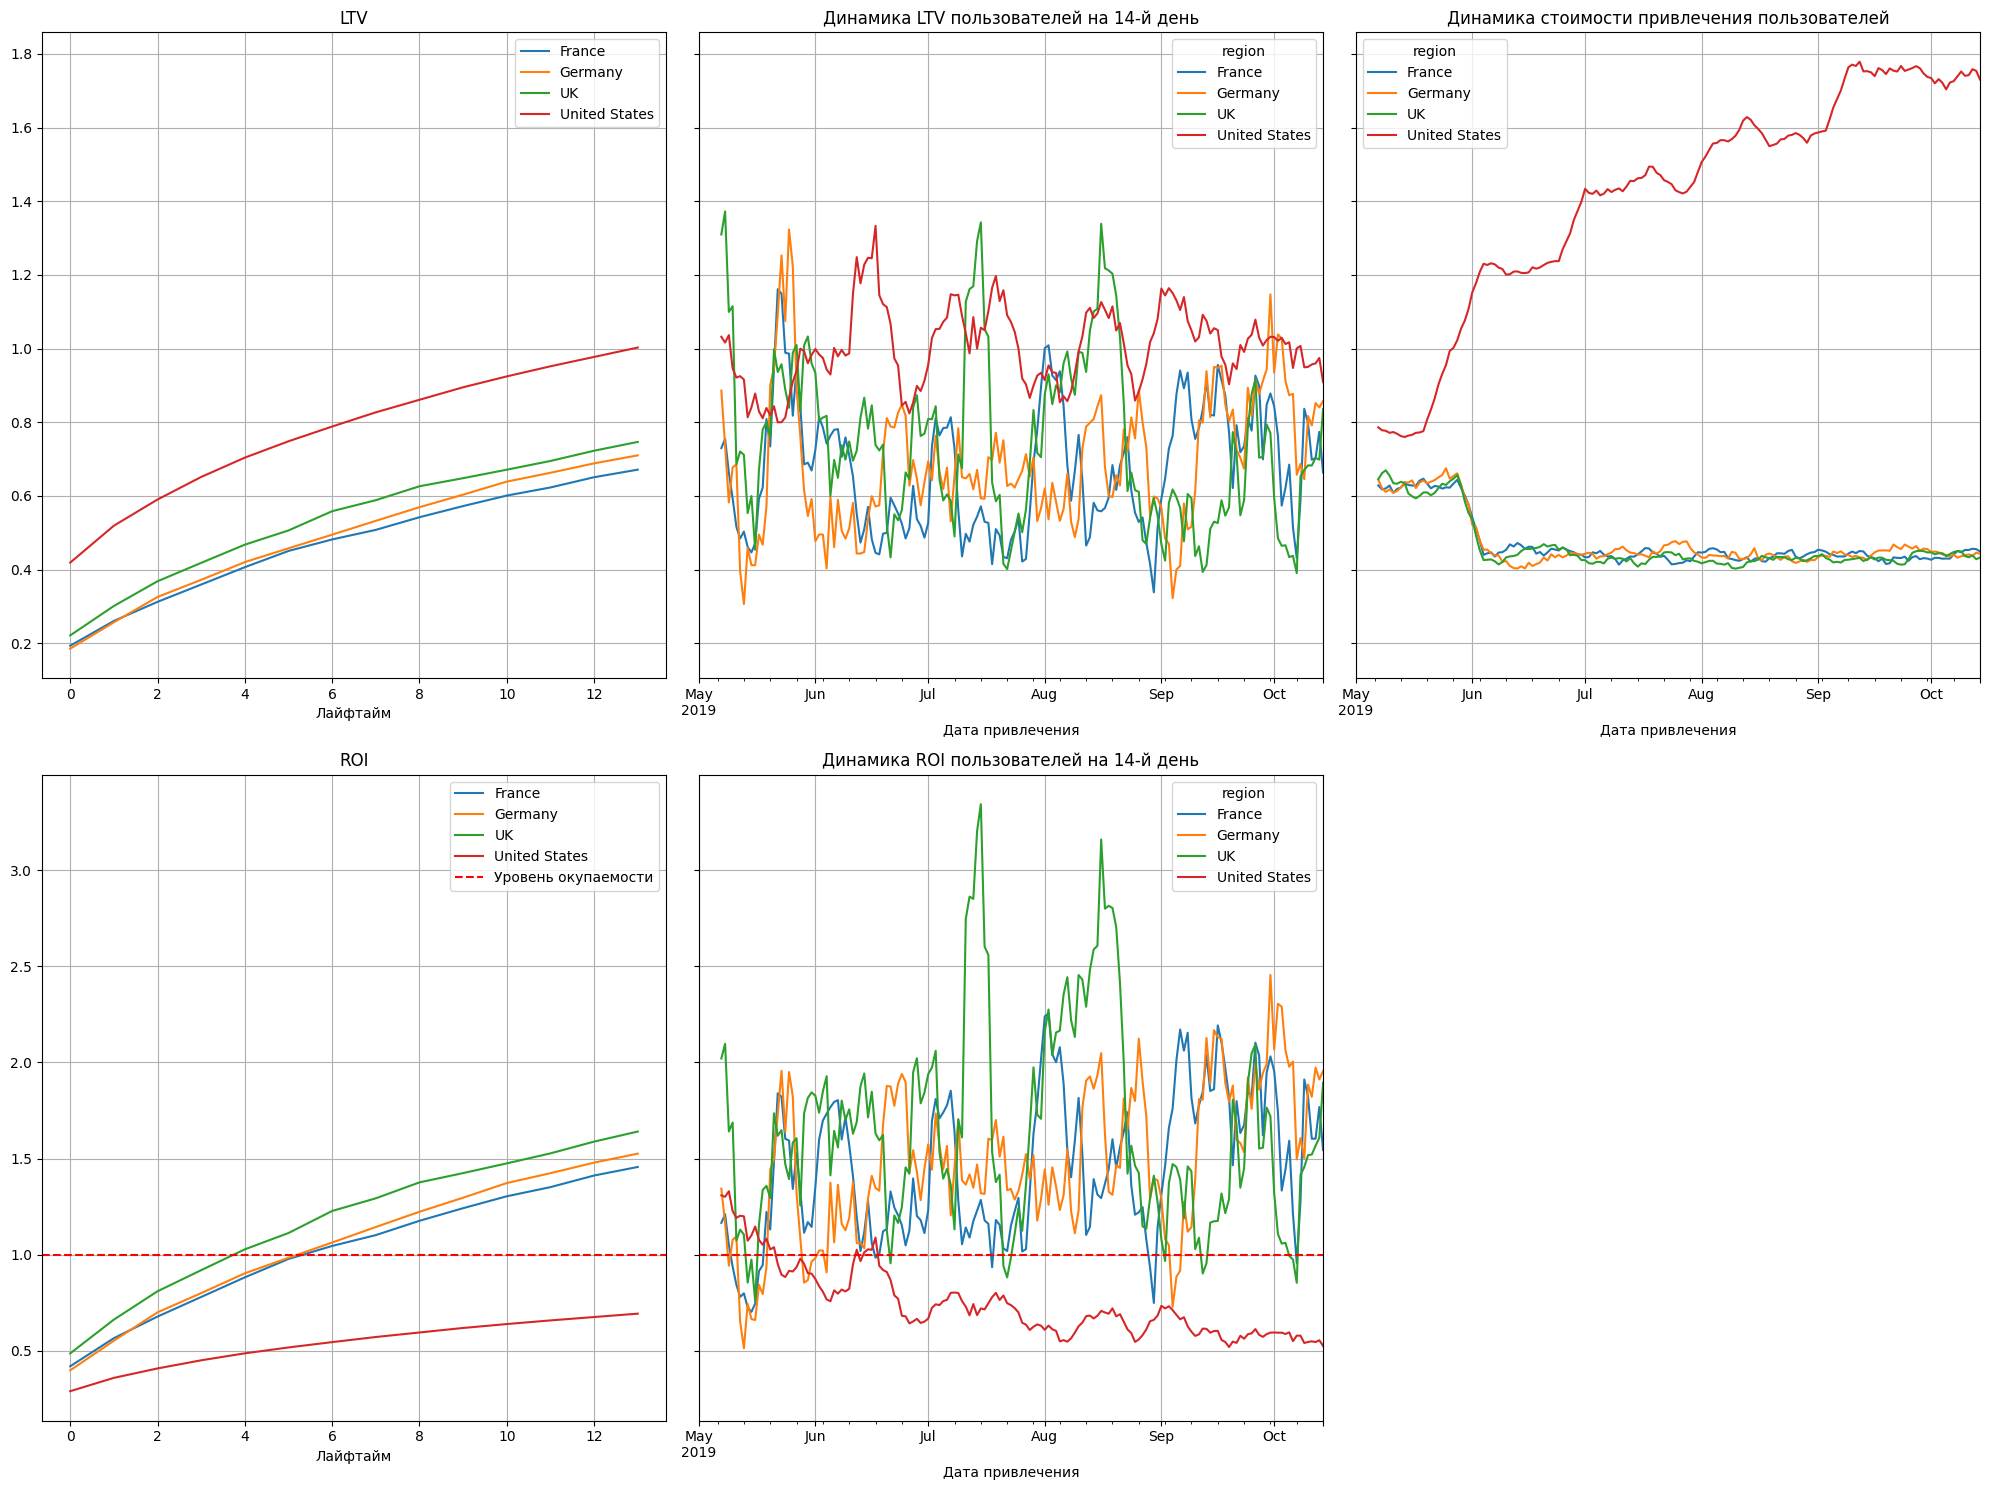

In [60]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, horizon_days, dimensions=['region'])
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7)

Похоже, что пользователи из США снова отличились, т.к. релама не окупается только в США, причем связано это с существенными тратами на рекламу - конверсию обеспечили, однако ценой окупаемости.

Далее посмотрим пристальнее на пользователей в США, "разложим" их по видам устройств и каналам привлечения.

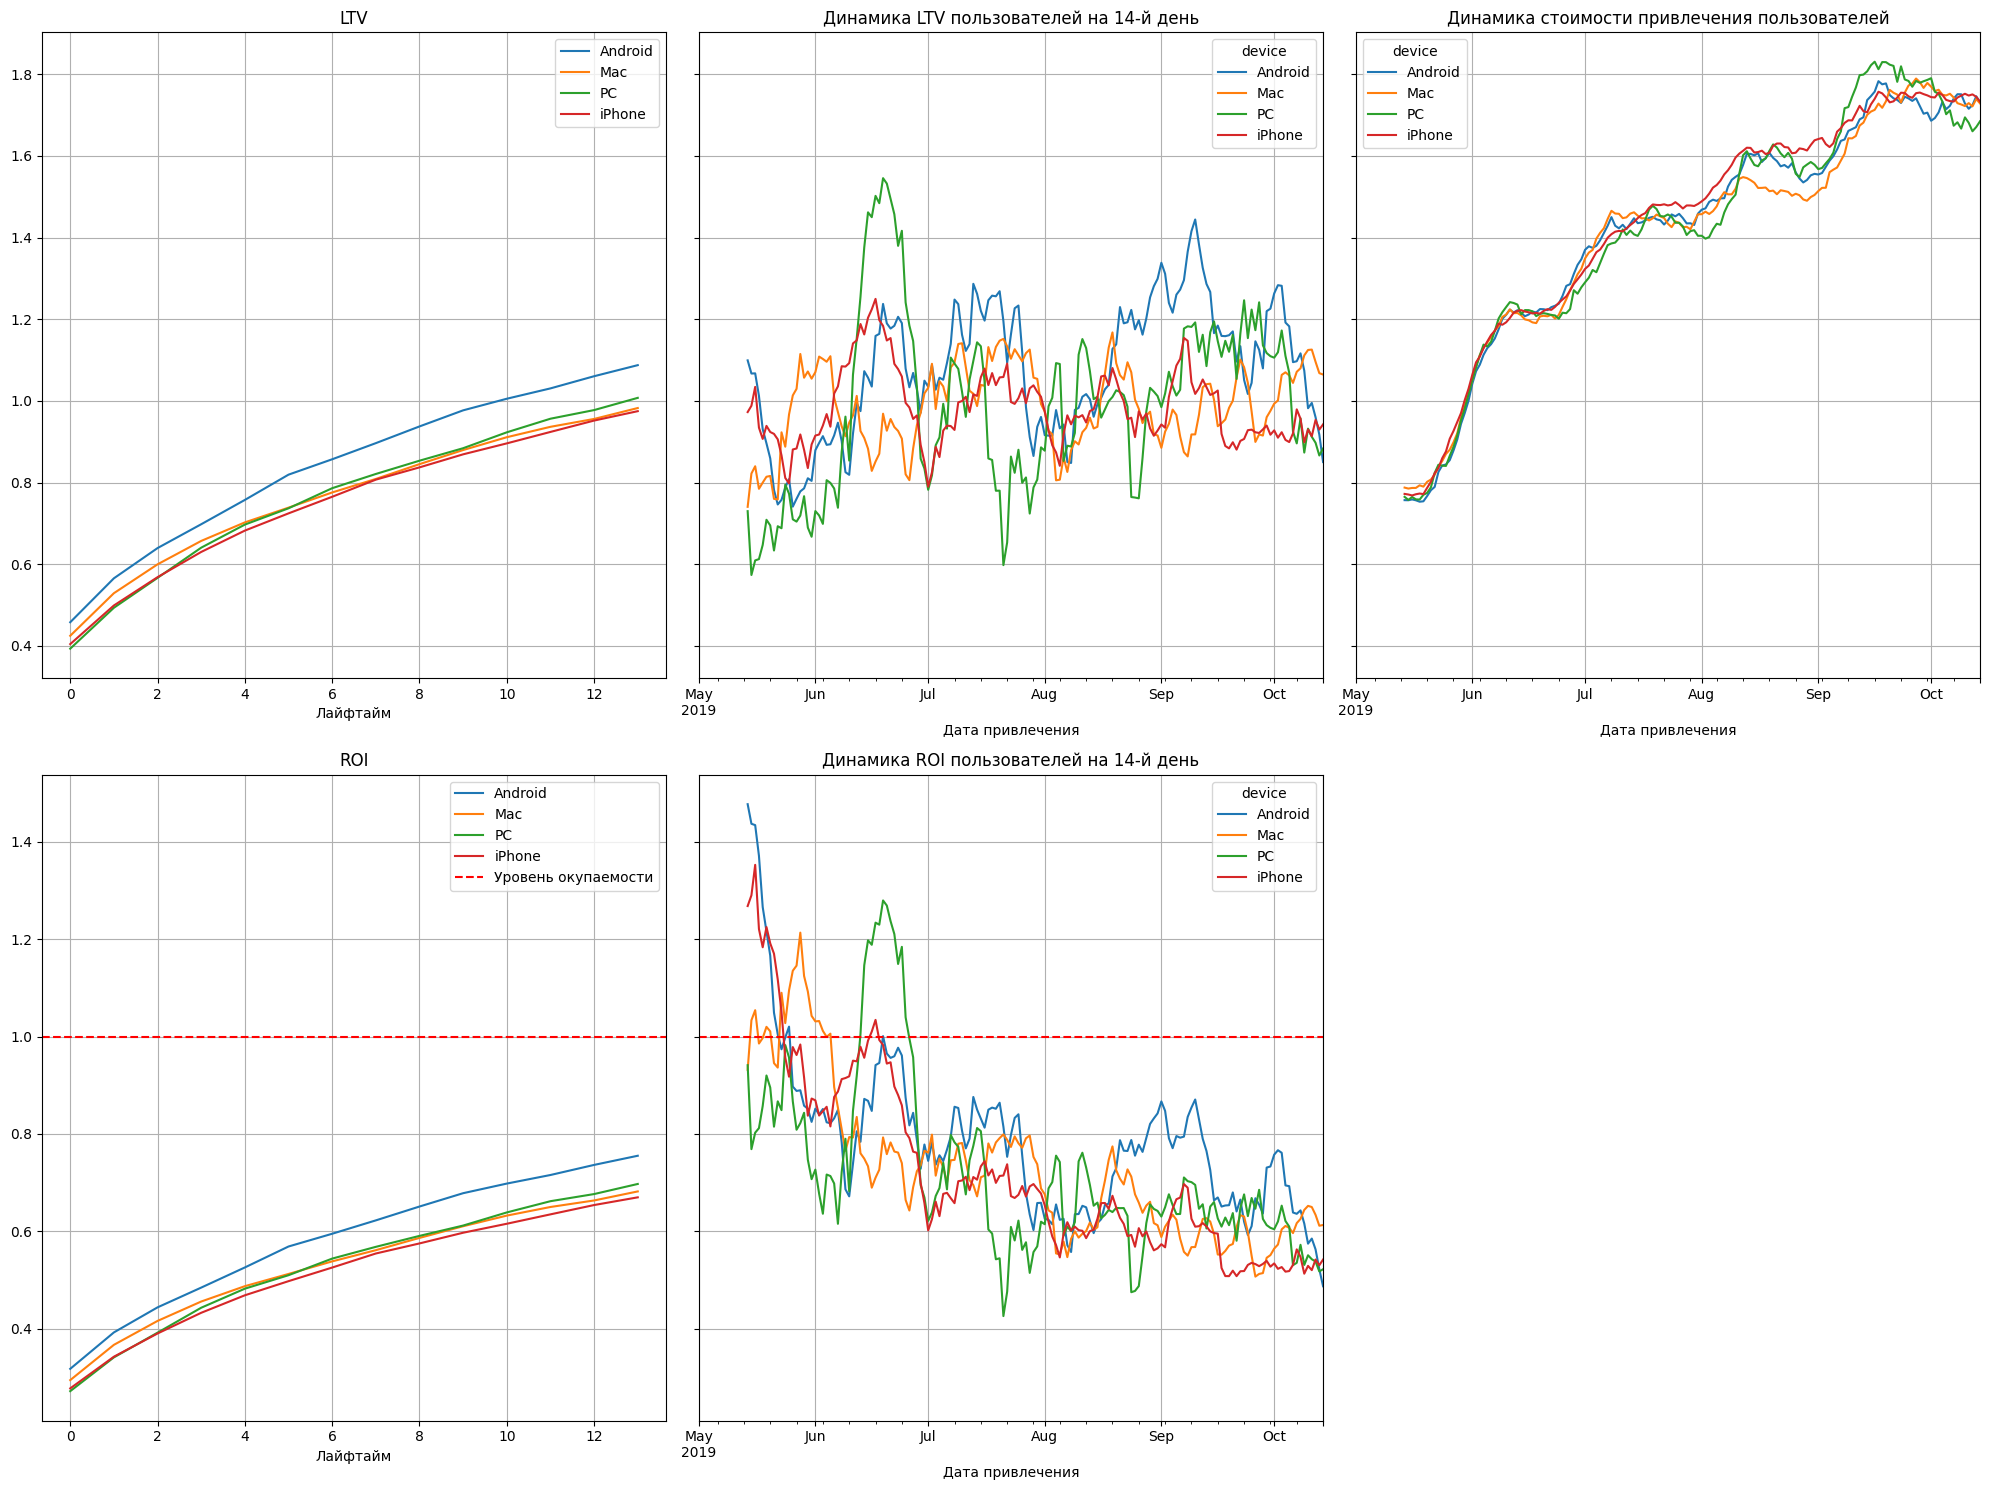

In [61]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles_usa, orders, observation_date, horizon_days, dimensions=['device'])
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

Реклама для пользователей всех без исключения устройств не окупается. Посмотрим как обстоят дела с каналами привлечения. 

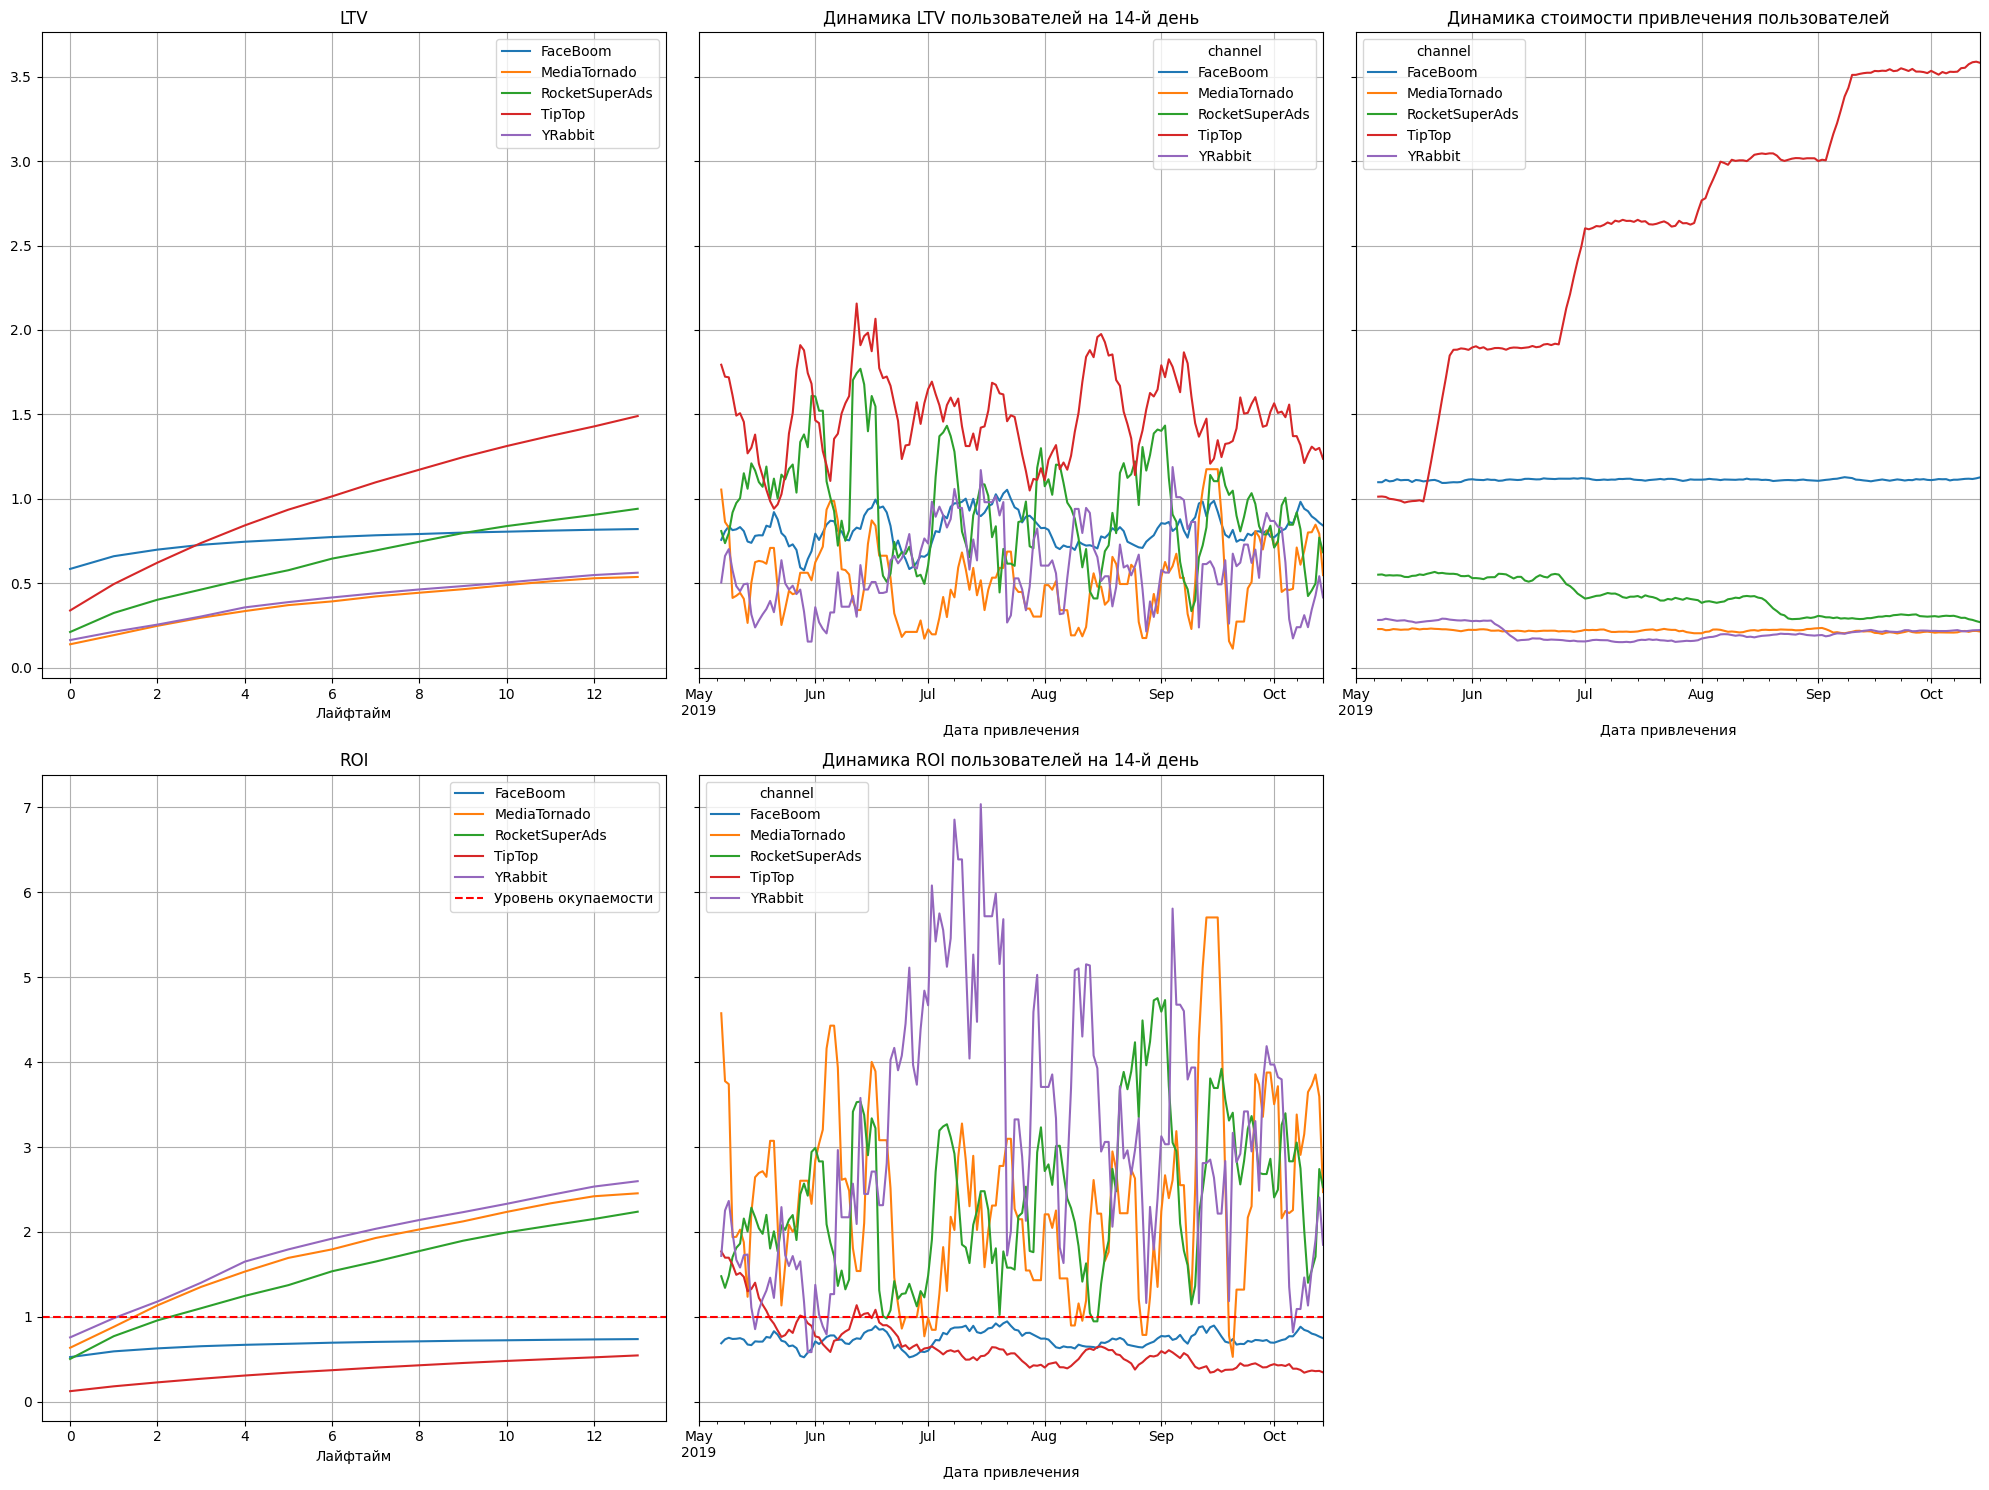

In [62]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles_usa, orders, observation_date, horizon_days, dimensions=['channel'])
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7)

Ответ, вероятно, найден. Затраты на привлечение пользователей по каналам привлечения FaceBoom и TipTop не окупаются, динамика ROI стабильно находиться ниже границы окупаемости. При этом реклама в YRabbit, MediaTornado и RockeSuperAds показывает очень хорошие результаты, как мы и отмечали **[ранее](#another_cell)**. 

## Выводы

**Основные проблемы:**

- затраты на рекламу в США, а конкретно в каналы привлечения TipTop и FaceBoom слишком большие, хотя рекламные компании и обеспечивают самую высокую конверсию, но удержание пользователей не обеспечивается, особенно пользователей, привлеченных на FaceBoom.

**Вероятные причины неэффективности привлечения пользователей:**
- дороговизна рекламы в FaceBoom, возможно присутствует навязчивость рекламы из-за чего страдает удержание пользователей;
- затраты на рекламу в TipTop непомерно высокие и необоснованные, кроме как желанием потратить побольше в данный канал привлечения объяснить это сложно.

**Рекомендации для отдела маркетинга**
- Попробовать рекламу в FaceBoom на себе на предмет ее навязчивости и исправности работы;
- Возможно стоит привлечь службу безопасности к рассмотрению вопроса непомерных трат на рекламу в TipTop;
- Учитывая эффективность рекламы целесообразно рассмотреть вопрос об отказе от рекламы в TipTop и FaceBoom, вместо этого можно увеличить рекламные бюдеты в YRabbit, MediaTornado и RockeSuperAds.

**[В НАЧАЛО](#to_beginning)**